# Plot Figures

Summary of all plots used in the Thesis with the underlying data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotnine import *

In [2]:
custom_colors = [
    "#1D2951",  # Space Cadet (dark blue)
    "#FFD166",  # Warm Yellow
    "#4BA3C3",  # Sky Blue
    "#F25C54",  # Coral Red
    "#007C91",  # Deep Teal
    "#EF798A",  # Dusty Rose
    "#6DCDB8",  # Mint Green
    "#FF9F1C",  # Vivid Orange
    "#6B4C9A",  # Violet Indigo
    "#A4C400",  # Lime Green
    "#8E7DBE",  # Lavender Purple
    "#2E8B57",  # Sea Green
]

In [3]:
# Bug causes the problem that automatic coloring does not work anymore
# -> Create custom color palette

# Add large qualitative colormaps together
colors = (
    plt.cm.Paired.colors
    + plt.cm.Set1.colors
    + plt.cm.tab20.colors
    + plt.cm.Set2.colors
    + plt.cm.tab20b.colors
    + plt.cm.Set3.colors
    + plt.cm.tab20c.colors
)

custom_colors_xl = [plt.matplotlib.colors.to_hex(c) for c in colors]
custom_colors_xl = custom_colors + custom_colors_xl

len(custom_colors_xl)

113

In [3]:
figure_theme = theme_minimal() + theme(
    plot_background=element_rect(fill="#ffffff", color="#ffffff"),
    plot_tag=element_text(face="bold"),
    axis_title=element_text(size=10, face="plain"),
    axis_text=element_text(size=9, face="plain"),
    text=element_text(family="DejaVu Sans"),
    legend_title=element_blank(),
)

## Activation Functions

In [50]:
data = [-3, -2, -1, 0, 1, 2, 3]

relu = lambda x: max(x, 0)


def leaky_relu(x):
    if x > 0:
        return x
    else:
        return x * 0.05


relu_data = [relu(x) for x in data]
l_relu_data = [leaky_relu(x) for x in data]

In [51]:
data = pd.DataFrame({"data": data, "relu": relu_data, "leaky_relu": l_relu_data})

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/relu_activation.svg


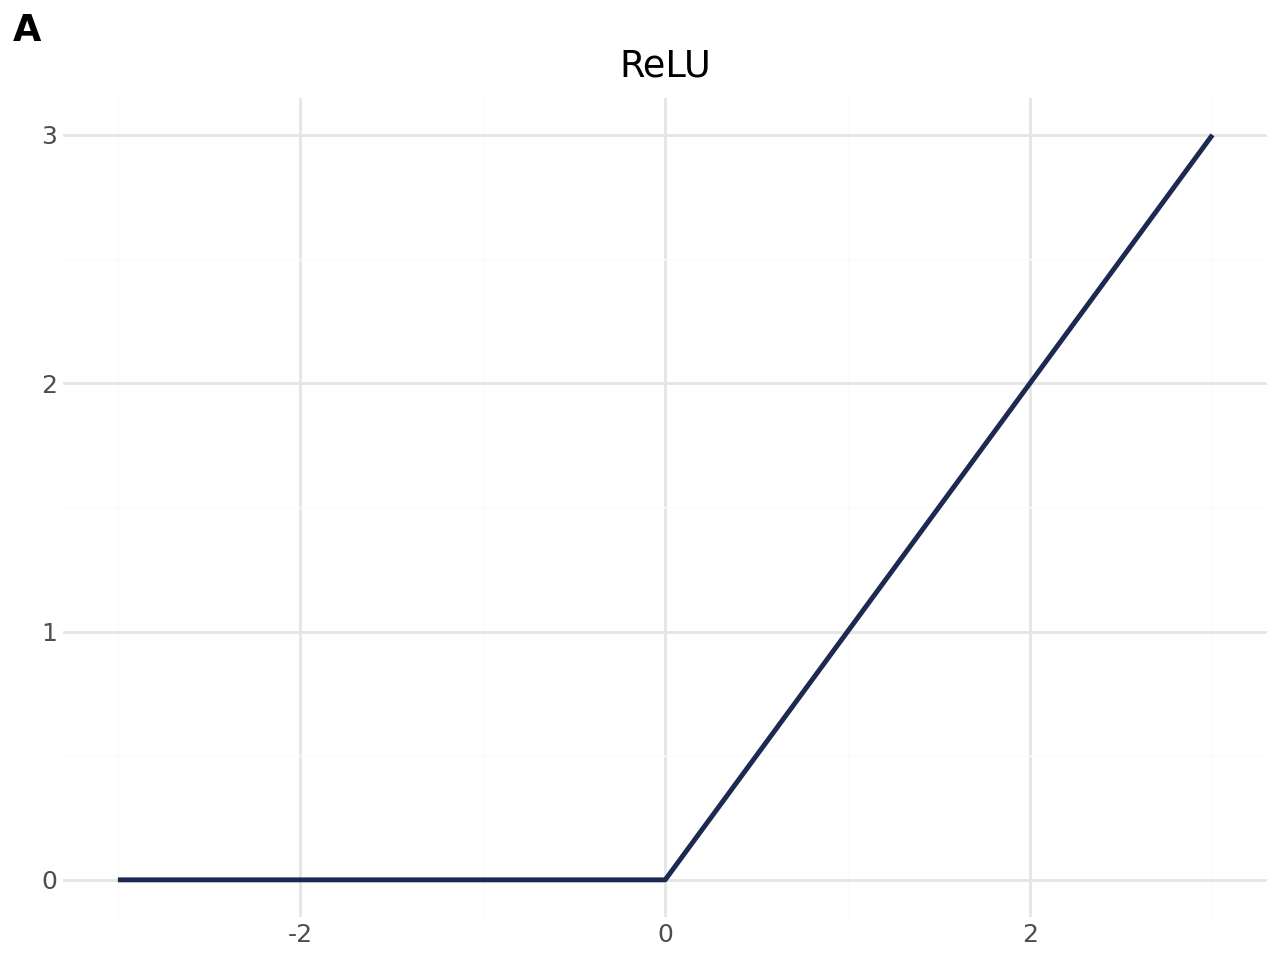

In [52]:
plot = (
    ggplot(data, aes(x="data", y="relu"))
    + geom_line(color="#1D2951", size=1)
    + labs(tag="A", title="ReLU", x="", y="")
    + figure_theme
)

plot.save("output/parts/relu_activation.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/leaky_relu_activation.svg


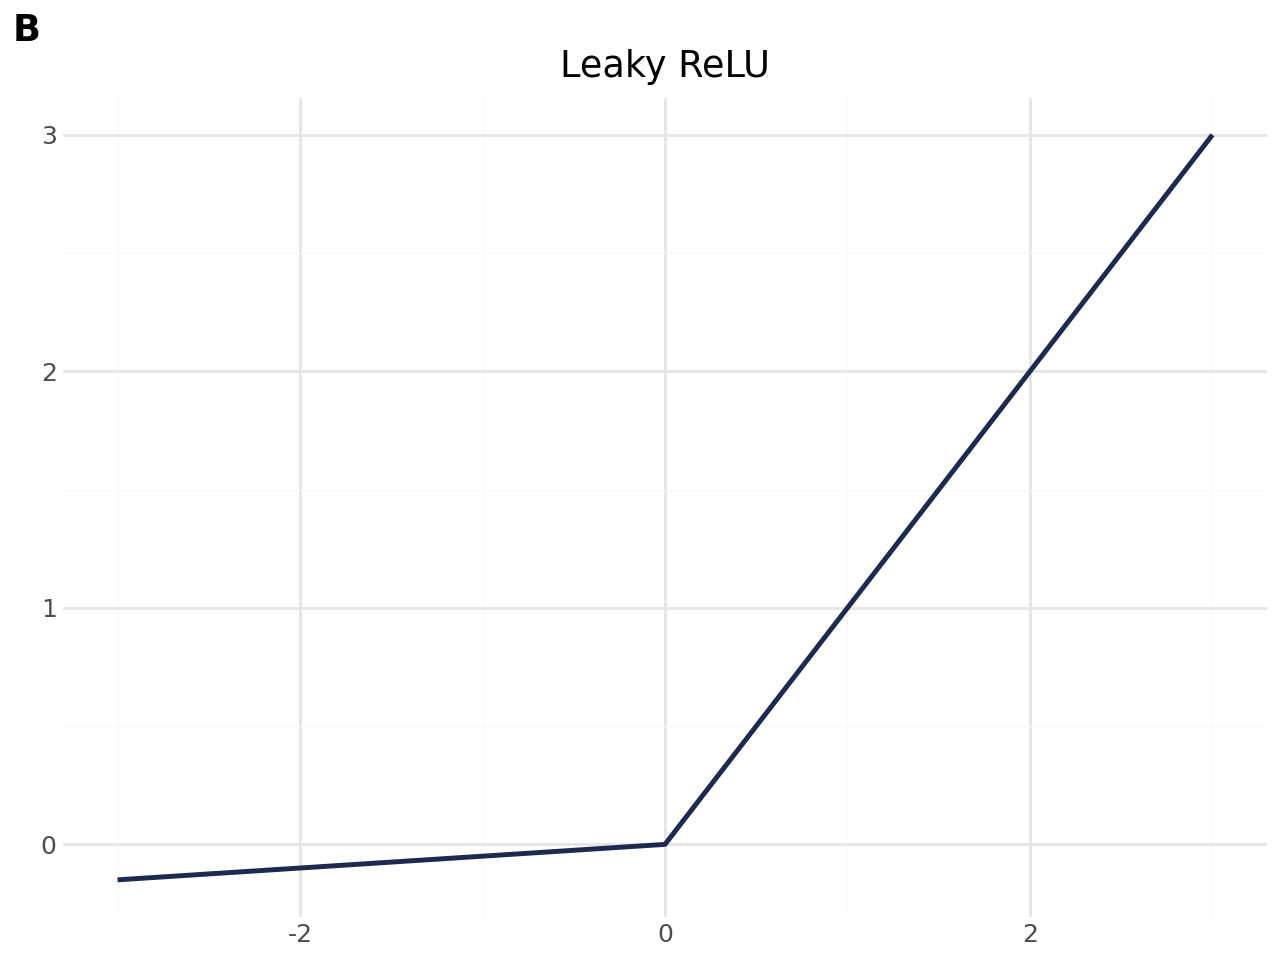

In [53]:
plot = (
    ggplot(data, aes(x="data", y="leaky_relu"))
    + geom_line(color="#1D2951", size=1)
    + labs(tag="B", title="Leaky ReLU", x="", y="")
    + figure_theme
)

plot.save("output/parts/leaky_relu_activation.svg", dpi=300)
plot

## Sankey Plot

In [16]:
fig = go.Figure(
    go.Sankey(
        arrangement="snap",
        node={
            "label": [
                "scRNA-seq",
                "Spatial Transcriptomics",
                "Training",
                "Training",
                "Validation",
                "Testing",
            ],
            "color": [
                "#1D2951",
                "#FFD166",
                "#2E8B57",
                "#007C91",
                "#6DCDB8",
                "#4BA3C3",
            ],
        },
        link={
            "source": [0, 0, 1, 2, 2],
            "target": [2, 5, 5, 3, 4],
            "value": [9, 1, 2, 7.5, 1.5],
            "color": [
                "rgba(46, 139, 87, 0.4)",
                "rgba(75, 163, 195, 0.4)",
                "rgba(75, 163, 195, 0.4)",
                "rgba(0, 124, 145, 0.4)",
                "rgba(109, 205, 184, 0.4)",
            ],
        },
    )
)

fig.write_image("output/parts/data_split.svg")
fig.show()

## Compare Architectures

In [6]:
# Model 1 = decoder architecture
summary_model_1 = pd.read_feather("data/liver_imputation_v4_1_run_fold_summary.feather")
summary_model_1

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained
0,1,0.028516,0.028368,0.028361,24
1,2,0.028493,0.028439,0.028419,62
2,3,0.028503,0.028438,0.028405,65
3,4,0.028522,0.028356,0.028329,25
4,5,0.028530,0.028347,0.028289,26
5,6,0.028509,0.028407,0.028387,25


In [5]:
epochs_model_1 = pd.read_feather(
    "data/liver_imputation_v4_1_run_training_metrics.feather"
)
epochs_model_1

,fold,epoch,train_loss,grad_norm,max_grad,val_loss
0,1,1,0.028934,0.006035,0.000246,0.028542
1,1,2,0.028549,0.005945,0.000087,0.028430
2,1,3,0.028510,0.005932,0.000078,0.028396
3,1,4,0.028499,0.005933,0.000099,0.028361
4,1,5,0.028496,0.005934,0.000074,0.028378
...,...,...,...,...,...,...
222,6,21,0.028511,0.005882,0.000120,0.028434
223,6,22,0.028512,0.005869,0.000112,0.028407
224,6,23,0.028512,0.005858,0.000112,0.028395
225,6,24,0.028512,0.005860,0.000123,0.028392


In [7]:
summary_model_2 = pd.read_feather("data/liver_imputation_v4_3_run_fold_summary.feather")
epochs_model_2 = pd.read_feather(
    "data/liver_imputation_v4_3_run_training_metrics.feather"
)

In [8]:
data = (
    pd.concat(
        [
            epochs_model_1.assign(model="Decoder-like"),
            epochs_model_2.assign(model="Bottleneck"),
        ]
    )
    .groupby(["model", "epoch"], as_index=False)
    .agg(mean_val_loss=("val_loss", "mean"), std_val_loss=("val_loss", "std"))
)

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/val_loss_model_architecture.svg


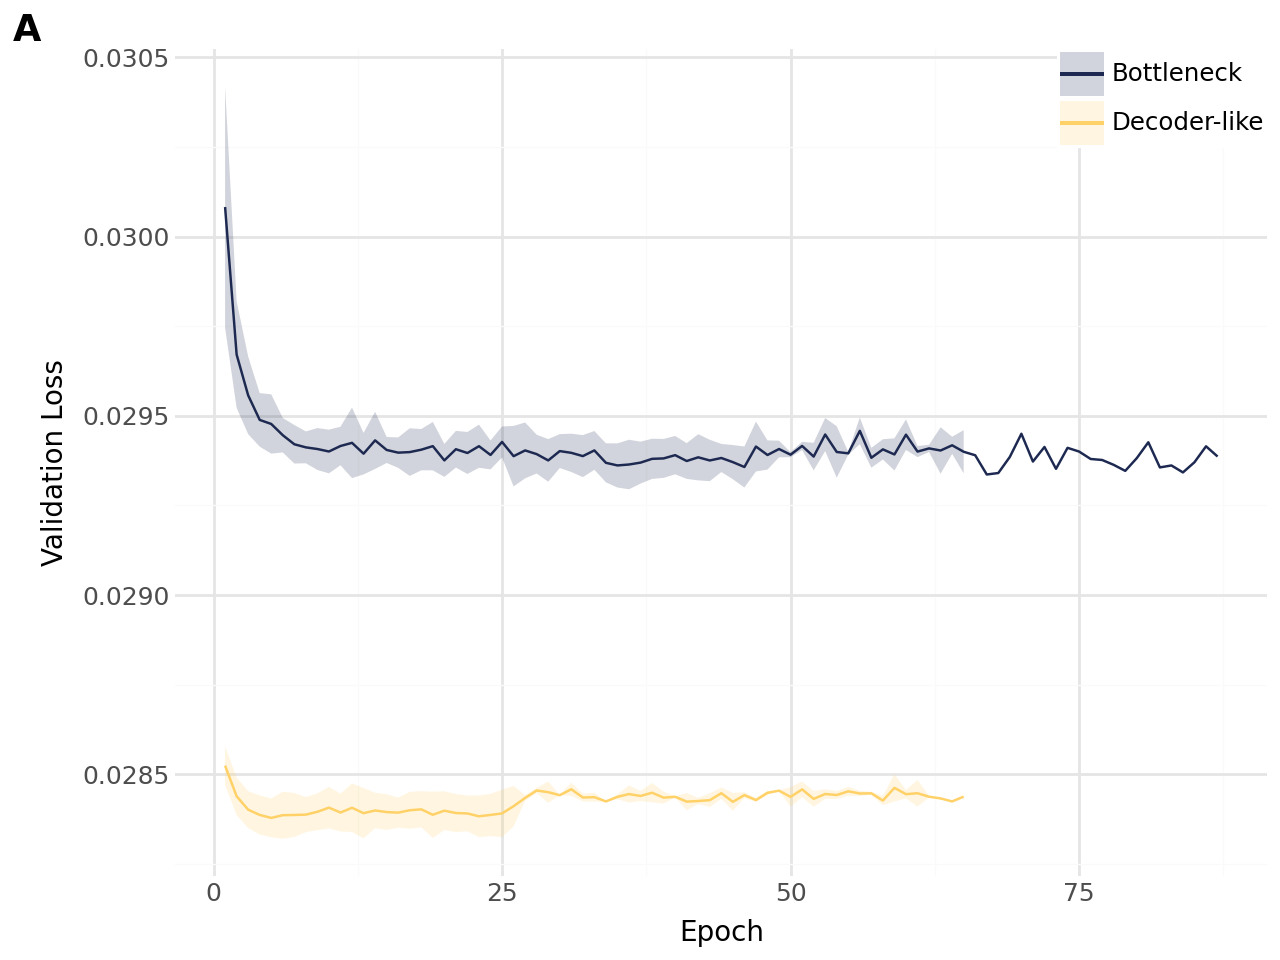

In [94]:
plot = (
    ggplot(data, aes(x="epoch", y="mean_val_loss", color="model", fill="model"))
    + geom_line()
    + geom_ribbon(
        aes(ymin="mean_val_loss-std_val_loss", ymax="mean_val_loss+std_val_loss"),
        alpha=0.2,
        color=None,
    )
    + scale_color_manual(values=custom_colors[:2])
    + scale_fill_manual(values=custom_colors[:2])
    + labs(tag="A", x="Epoch", y="Validation Loss")
    + figure_theme
    + theme(
        legend_title=element_blank(),
        legend_position=(1, 1),
        legend_justification=(1, 1),
        legend_background=element_rect(fill="white", color="none"),
    )
)

plot.save("output/parts/val_loss_model_architecture.svg", dpi=300)
plot

In [95]:
data = pd.concat(
    [
        summary_model_1.assign(model="Decoder-like"),
        summary_model_2.assign(model="Bottleneck"),
    ]
)

data

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained,model
0,1,0.028516,0.028368,0.028361,24,Decoder-like
1,2,0.028493,0.028439,0.028419,62,Decoder-like
2,3,0.028503,0.028438,0.028405,65,Decoder-like
3,4,0.028522,0.028356,0.028329,25,Decoder-like
4,5,0.028530,0.028347,0.028289,26,Decoder-like
5,6,0.028509,0.028407,0.028387,25,Decoder-like
0,1,0.029838,0.029386,0.029336,87,Bottleneck
1,2,0.029806,0.029435,0.029425,33,Bottleneck
2,3,0.029801,0.029442,0.029377,65,Bottleneck
3,4,0.029861,0.029354,0.029308,46,Bottleneck


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/boxplot_model_architecture.svg


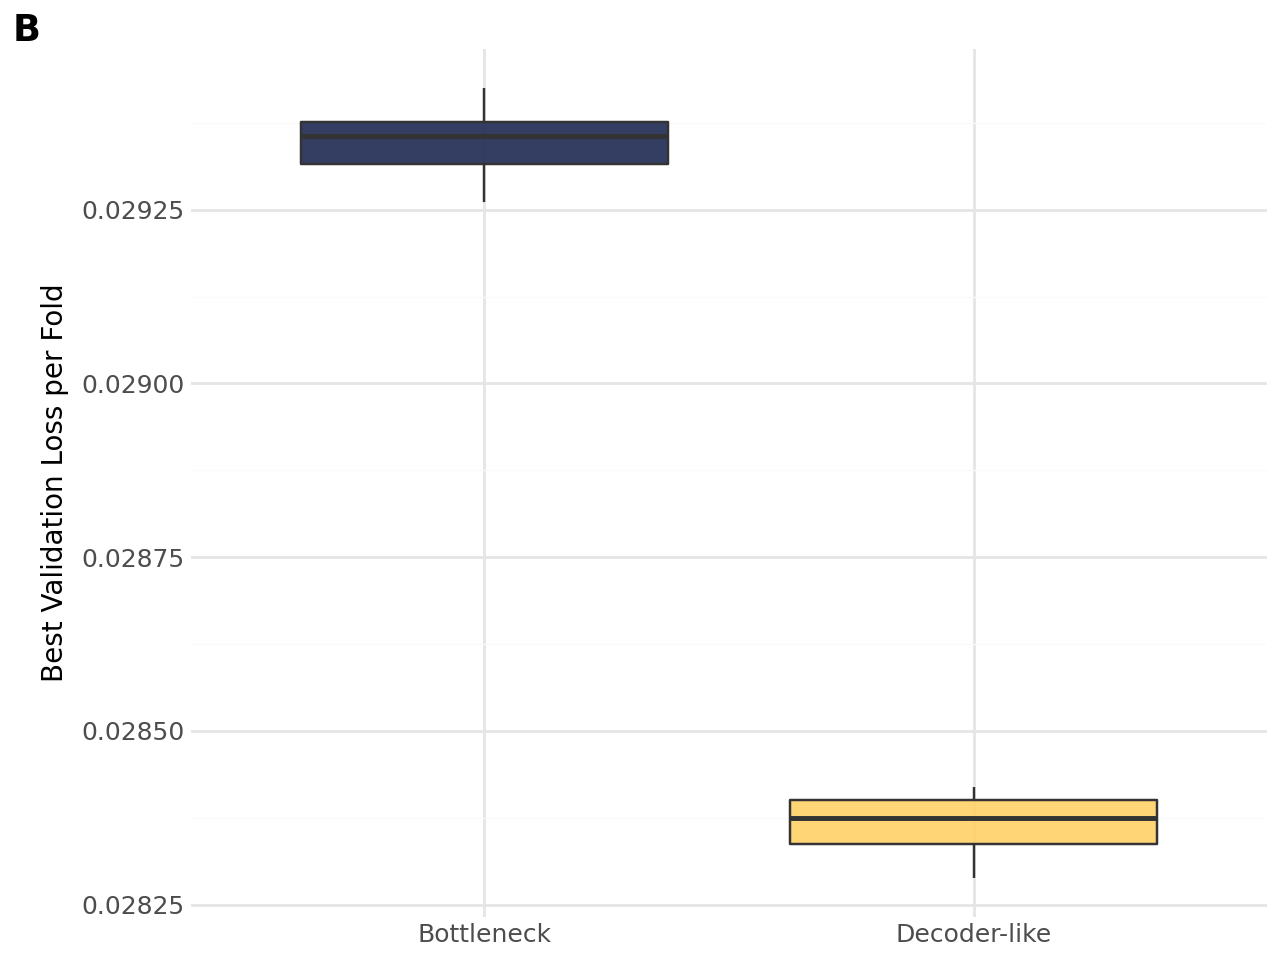

In [96]:
plot = (
    ggplot(data, aes(x="model", y="min_val_loss", fill="model"))
    + geom_boxplot(alpha=0.9)
    + scale_fill_manual(values=custom_colors[:2])
    + labs(tag="B", y="Best Validation Loss per Fold", x="")
    + guides(fill="none")
    + figure_theme
)

plot.save("output/parts/boxplot_model_architecture.svg", dpi=300)
plot

In [97]:
summary_model_1.loc[summary_model_1["min_val_loss"].idxmin()]

fold                 5.000000
final_train_loss     0.028530
final_val_loss       0.028347
min_val_loss         0.028289
epochs_trained      26.000000
Name: 4, dtype: float64

In [98]:
summary_model_2.loc[summary_model_1["min_val_loss"].idxmin()]

fold                 5.000000
final_train_loss     0.029835
final_val_loss       0.029268
min_val_loss         0.029261
epochs_trained      46.000000
Name: 4, dtype: float64

In [99]:
data = pd.concat(
    [
        epochs_model_1[epochs_model_1.fold == 5].assign(model="Decoder-like"),
        epochs_model_2[epochs_model_2.fold == 5].assign(model="Bottleneck"),
    ]
)

data = data.melt(
    id_vars=["model", "epoch"],
    value_vars=["train_loss", "val_loss"],
    var_name="loss_type",
    value_name="loss",
)

data["loss_type"] = data["loss_type"].replace(
    {"train_loss": "Train Loss", "val_loss": "Val Loss"}
)

data

,model,epoch,loss_type,loss
0,Decoder-like,1,Train Loss,0.028946
1,Decoder-like,2,Train Loss,0.028557
2,Decoder-like,3,Train Loss,0.028523
3,Decoder-like,4,Train Loss,0.028511
4,Decoder-like,5,Train Loss,0.028507
...,...,...,...,...
139,Bottleneck,42,Val Loss,0.029330
140,Bottleneck,43,Val Loss,0.029282
141,Bottleneck,44,Val Loss,0.029324
142,Bottleneck,45,Val Loss,0.029320


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/model_fit_architecture_1.svg


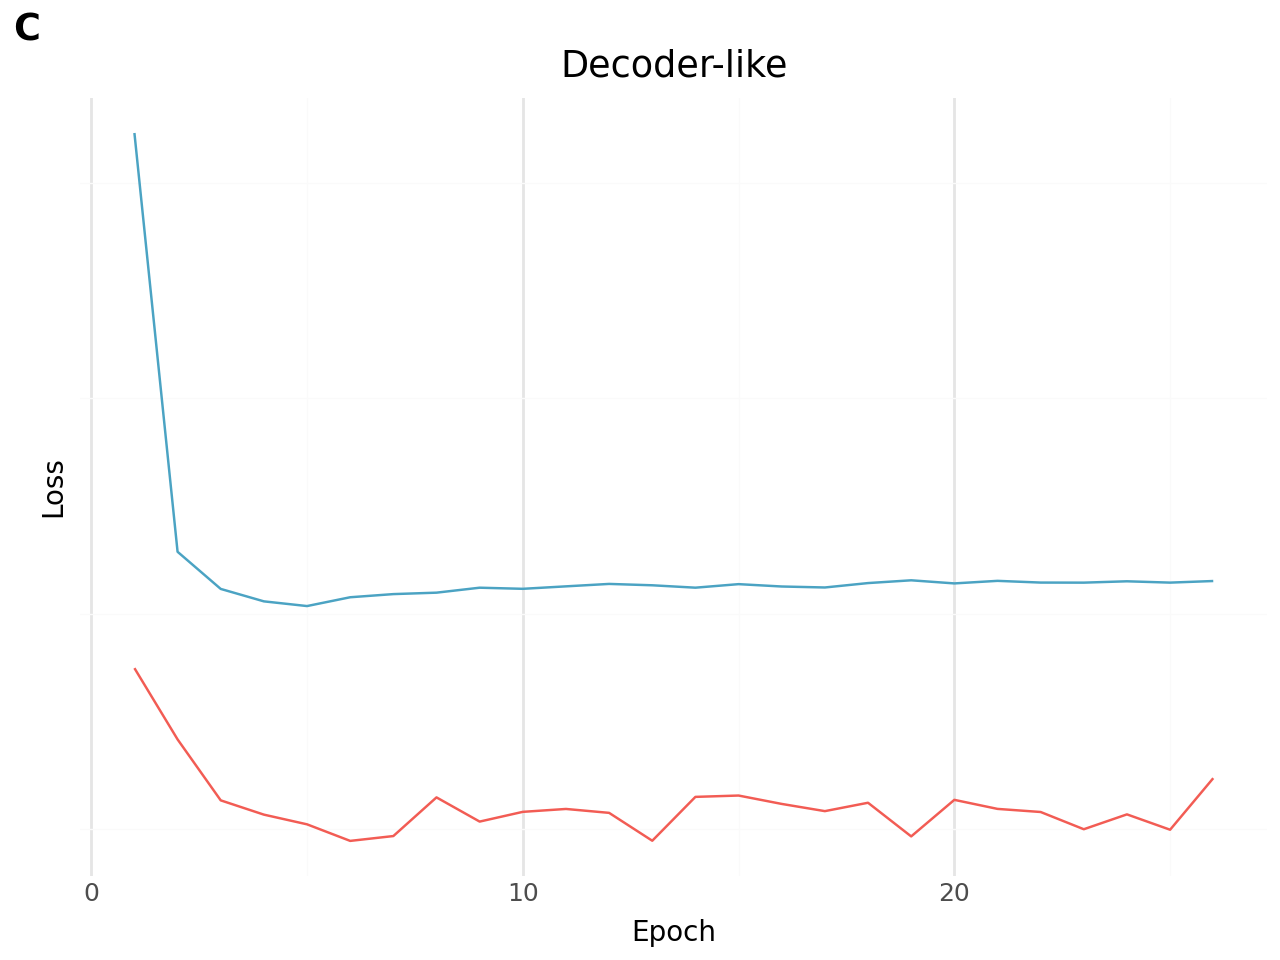

In [108]:
plot = (
    ggplot(
        data[data["model"] == "Decoder-like"],
        aes(x="epoch", y="loss", color="loss_type"),
    )
    + geom_line()
    + scale_color_manual(values=custom_colors[2:4])
    + labs(tag="C", title="Decoder-like", x="Epoch", y="Loss")
    + guides(color="none")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_y=element_blank(),
    )
)

plot.save("output/parts/model_fit_architecture_1.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/model_fit_architecture_2.svg


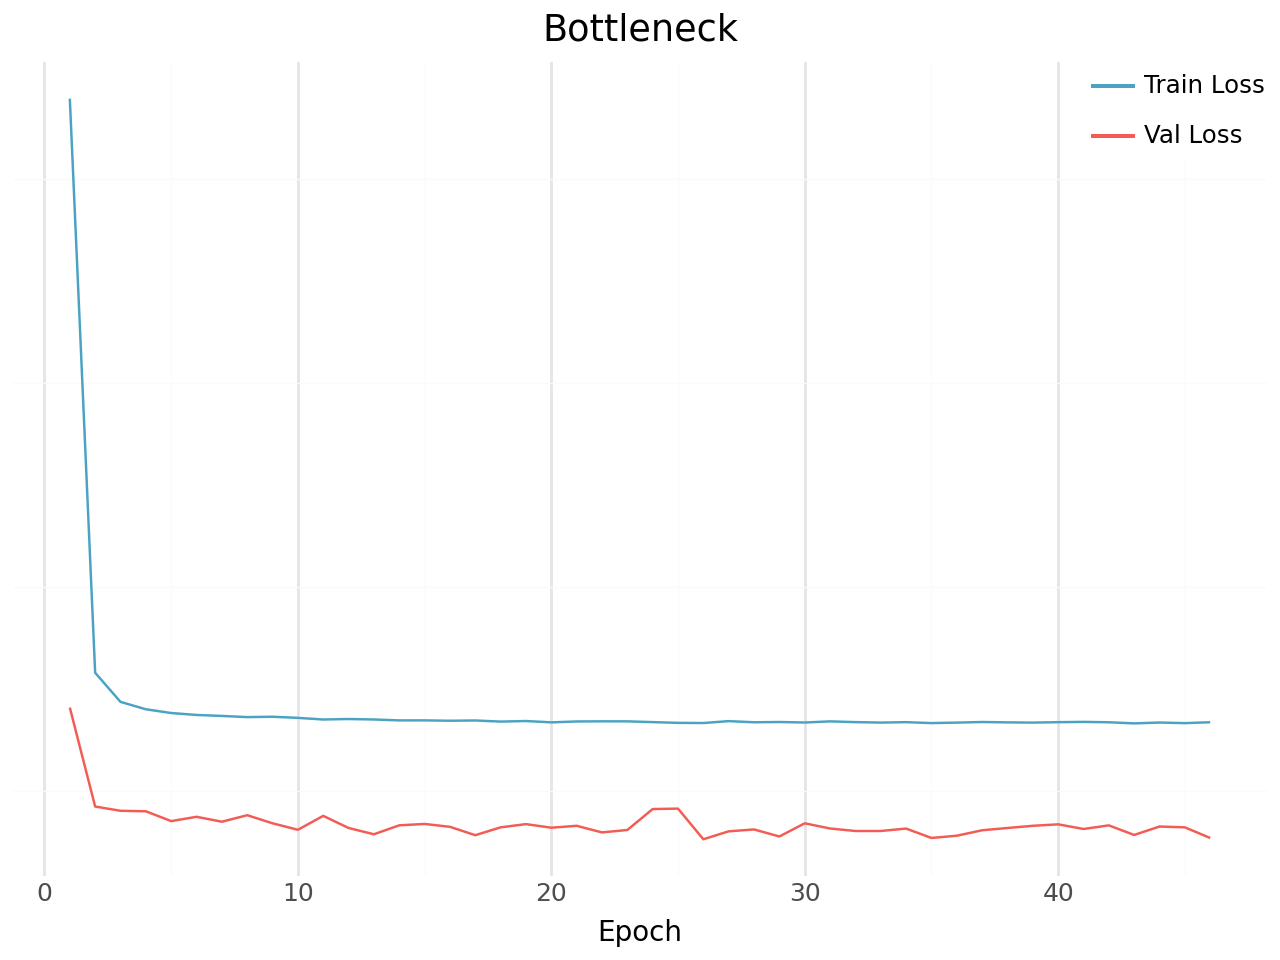

In [107]:
plot = (
    ggplot(
        data[data["model"] == "Bottleneck"],
        aes(x="epoch", y="loss", color="loss_type"),
    )
    + geom_line()
    + scale_color_manual(values=custom_colors[2:4])
    + labs(title="Bottleneck", x="Epoch", y="")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_y=element_blank(),
        legend_title=element_blank(),
        legend_position=(1, 1),
        legend_justification=(1, 1),
        legend_background=element_rect(fill="white", color="none"),
    )
)

plot.save("output/parts/model_fit_architecture_2.svg", dpi=300)
plot

In [65]:
data = (
    pd.concat(
        [
            epochs_model_1.assign(model="Decoder-like"),
            epochs_model_2.assign(model="Bottleneck"),
        ]
    )
    .groupby(["model", "epoch"], as_index=False)
    .agg(mean_grad=("grad_norm", "mean"), std_grad=("grad_norm", "std"))
)

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/grad_norm_model_architecture.svg


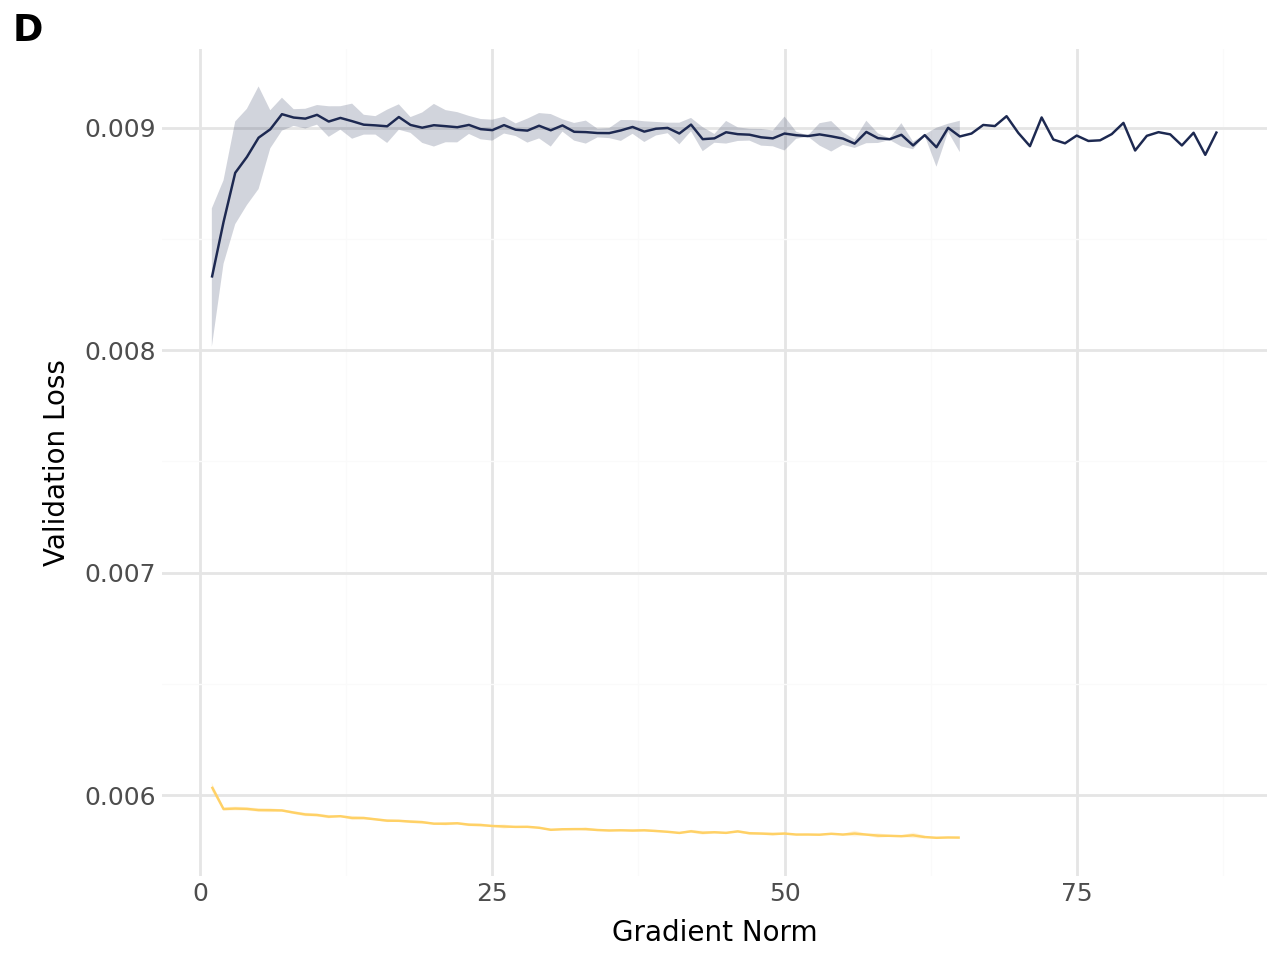

In [66]:
plot = (
    ggplot(data, aes(x="epoch", y="mean_grad", color="model", fill="model"))
    + geom_line()
    + geom_ribbon(
        aes(ymin="mean_grad-std_grad", ymax="mean_grad+std_grad"),
        alpha=0.2,
        color=None,
    )
    + scale_color_manual(values=custom_colors[:2])
    + scale_fill_manual(values=custom_colors[:2])
    + labs(tag="D", x="Gradient Norm", y="Validation Loss")
    + guides(fill="none", color="none")
    + figure_theme
)

plot.save("output/parts/grad_norm_model_architecture.svg", dpi=300)
plot

## Compare Hyperparameters

In [109]:
# Model 1 = decoder architecture
summary_model_1 = pd.read_feather("data/liver_imputation_v4_1_run_fold_summary.feather")
summary_model_1

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained
0,1,0.028516,0.028368,0.028361,24
1,2,0.028493,0.028439,0.028419,62
2,3,0.028503,0.028438,0.028405,65
3,4,0.028522,0.028356,0.028329,25
4,5,0.028530,0.028347,0.028289,26
5,6,0.028509,0.028407,0.028387,25


In [110]:
epochs_model_1 = pd.read_feather(
    "data/liver_imputation_v4_1_run_training_metrics.feather"
)
epochs_model_1

,fold,epoch,train_loss,grad_norm,max_grad,val_loss
0,1,1,0.028934,0.006035,0.000246,0.028542
1,1,2,0.028549,0.005945,0.000087,0.028430
2,1,3,0.028510,0.005932,0.000078,0.028396
3,1,4,0.028499,0.005933,0.000099,0.028361
4,1,5,0.028496,0.005934,0.000074,0.028378
...,...,...,...,...,...,...
222,6,21,0.028511,0.005882,0.000120,0.028434
223,6,22,0.028512,0.005869,0.000112,0.028407
224,6,23,0.028512,0.005858,0.000112,0.028395
225,6,24,0.028512,0.005860,0.000123,0.028392


In [111]:
summary_model_2 = pd.read_feather("data/liver_imputation_v4_2_run_fold_summary.feather")
epochs_model_2 = pd.read_feather(
    "data/liver_imputation_v4_2_run_training_metrics.feather"
)

In [112]:
data = (
    pd.concat(
        [
            epochs_model_1.assign(model="Standard"),
            epochs_model_2.assign(model="Optimized"),
        ]
    )
    .groupby(["model", "epoch"], as_index=False)
    .agg(mean_val_loss=("val_loss", "mean"), std_val_loss=("val_loss", "std"))
)

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/val_loss_hyperparameters.svg


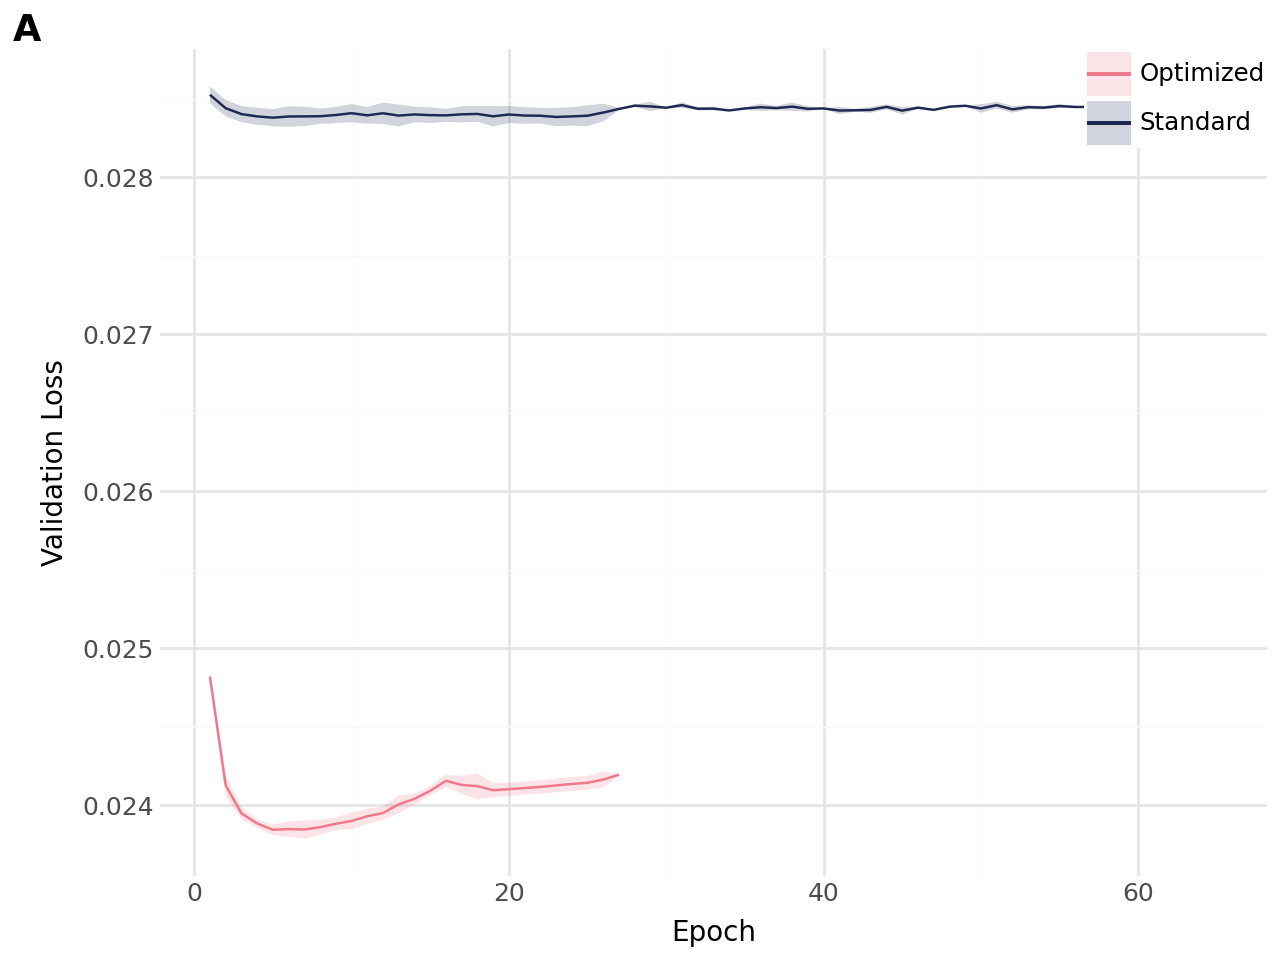

In [113]:
plot_A = (
    ggplot(data, aes(x="epoch", y="mean_val_loss", color="model", fill="model"))
    + geom_line()
    + geom_ribbon(
        aes(ymin="mean_val_loss-std_val_loss", ymax="mean_val_loss+std_val_loss"),
        alpha=0.2,
        color=None,
    )
    + scale_color_manual(values=[custom_colors[5], custom_colors[0]])
    + scale_fill_manual(values=[custom_colors[5], custom_colors[0]])
    + labs(tag="A", x="Epoch", y="Validation Loss")
    + figure_theme
    + theme(
        legend_title=element_blank(),
        legend_position=(1, 1),
        legend_justification=(1, 1),
        legend_background=element_rect(fill="white", color="none"),
    )
)

plot_A.save("output/parts/val_loss_hyperparameters.svg", dpi=300)
plot_A

In [114]:
data = pd.concat(
    [
        summary_model_1.assign(model="Standard"),
        summary_model_2.assign(model="Optimized"),
    ]
)

data

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained,model
0,1,0.028516,0.028368,0.028361,24,Standard
1,2,0.028493,0.028439,0.028419,62,Standard
2,3,0.028503,0.028438,0.028405,65,Standard
3,4,0.028522,0.028356,0.028329,25,Standard
4,5,0.028530,0.028347,0.028289,26,Standard
5,6,0.028509,0.028407,0.028387,25,Standard
0,1,0.021749,0.024198,0.023810,27,Optimized
1,2,0.021962,0.024151,0.023891,25,Optimized
2,3,0.021861,0.024182,0.023867,26,Optimized
3,4,0.021732,0.024190,0.023803,27,Optimized


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/boxplot_hyperparameters.svg


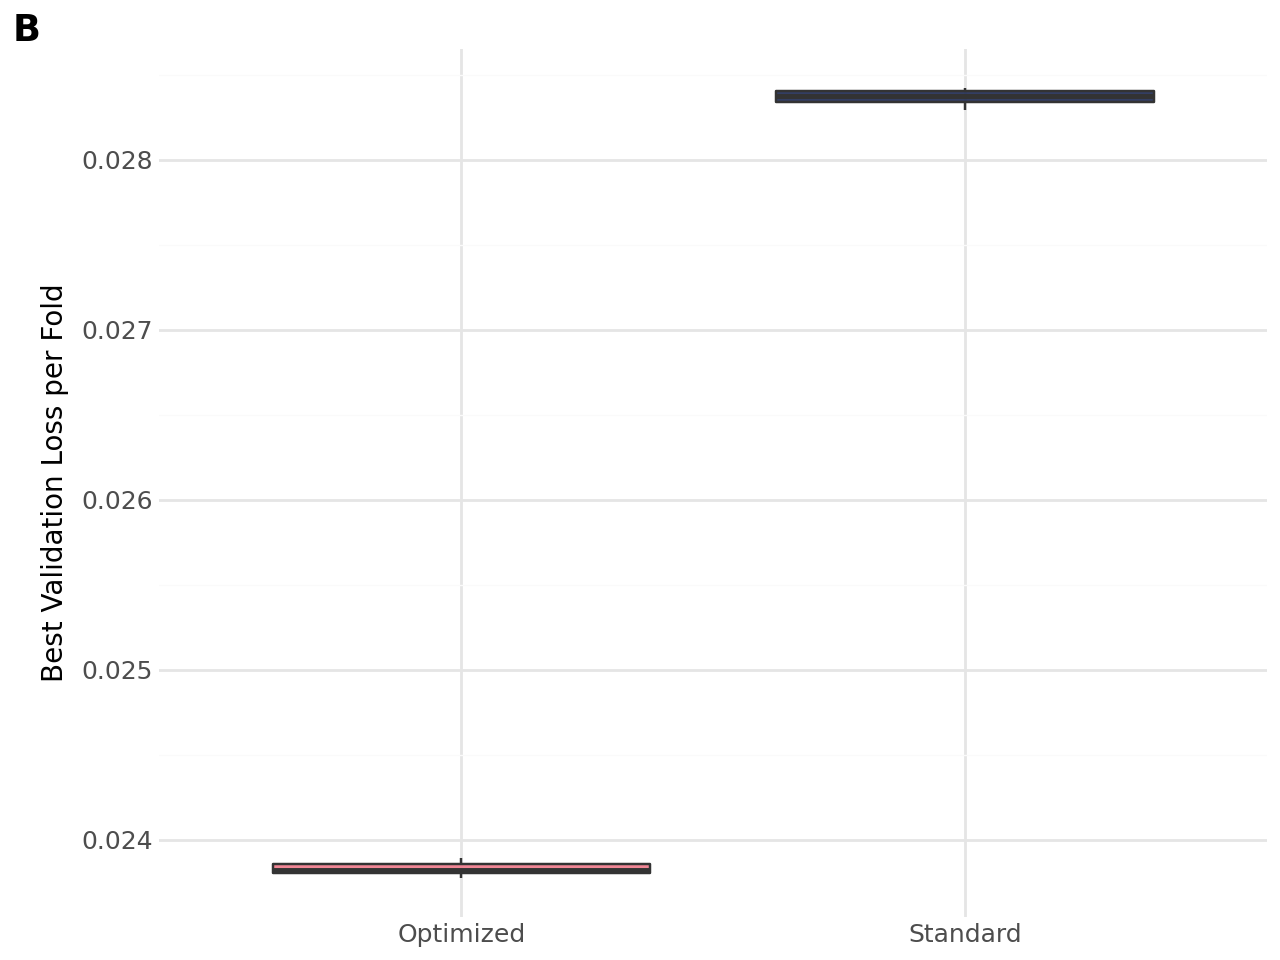

In [115]:
plot_B = (
    ggplot(data, aes(x="model", y="min_val_loss", fill="model"))
    + geom_boxplot(alpha=0.9)
    + scale_fill_manual(values=[custom_colors[5], custom_colors[0]])
    + labs(tag="B", y="Best Validation Loss per Fold", x="")
    + guides(fill="none")
    + figure_theme
)

plot_B.save("output/parts/boxplot_hyperparameters.svg", dpi=300)
plot_B

In [116]:
summary_model_1.loc[summary_model_1["min_val_loss"].idxmin()]

fold                 5.000000
final_train_loss     0.028530
final_val_loss       0.028347
min_val_loss         0.028289
epochs_trained      26.000000
Name: 4, dtype: float64

In [117]:
summary_model_2.loc[summary_model_1["min_val_loss"].idxmin()]

fold                 5.000000
final_train_loss     0.021885
final_val_loss       0.024088
min_val_loss         0.023777
epochs_trained      26.000000
Name: 4, dtype: float64

In [118]:
data = pd.concat(
    [
        epochs_model_1[epochs_model_1.fold == 5].assign(model="Standard"),
        epochs_model_2[epochs_model_2.fold == 5].assign(model="Optimized"),
    ]
)

data = data.melt(
    id_vars=["model", "epoch"],
    value_vars=["train_loss", "val_loss"],
    var_name="loss_type",
    value_name="loss",
)

data["loss_type"] = data["loss_type"].replace(
    {"train_loss": "Train Loss", "val_loss": "Val Loss"}
)

data

,model,epoch,loss_type,loss
0,Standard,1,Train Loss,0.028946
1,Standard,2,Train Loss,0.028557
2,Standard,3,Train Loss,0.028523
3,Standard,4,Train Loss,0.028511
4,Standard,5,Train Loss,0.028507
...,...,...,...,...
99,Optimized,22,Val Loss,0.024059
100,Optimized,23,Val Loss,0.024069
101,Optimized,24,Val Loss,0.024074
102,Optimized,25,Val Loss,0.024084


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/model_fit_hyperparmeters_1.svg


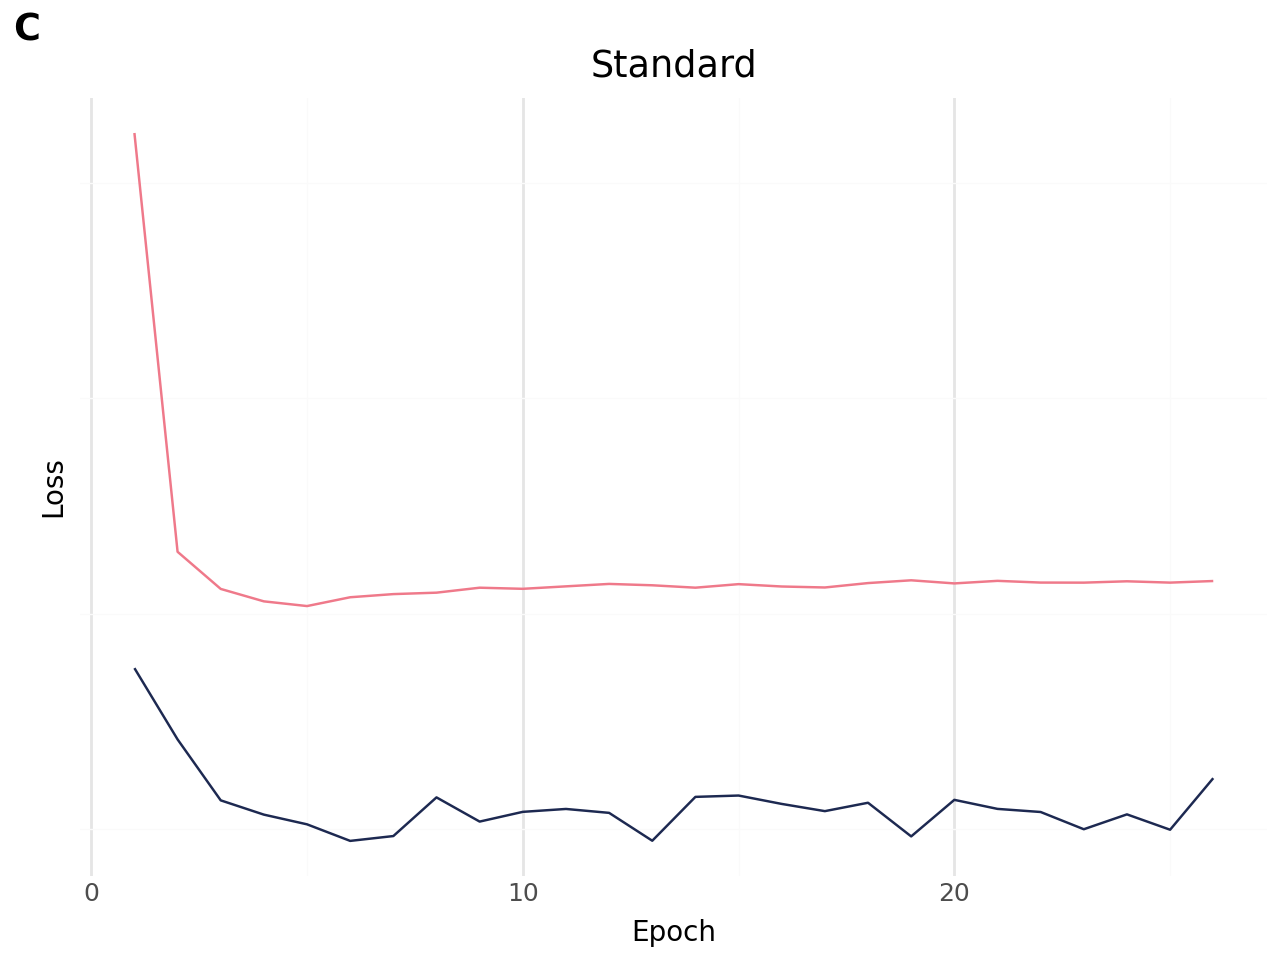

In [120]:
plot_C = (
    ggplot(data[data.model == "Standard"], aes(x="epoch", y="loss", color="loss_type"))
    + geom_line()
    + scale_color_manual(values=[custom_colors[5], custom_colors[0]])
    + labs(tag="C", title="Standard", x="Epoch", y="Loss")
    + guides(color="none")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_y=element_blank(),
    )
)

plot_C.save("output/parts/model_fit_hyperparmeters_1.svg", dpi=300)
plot_C

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/model_fit_hyperparmeters_2.svg


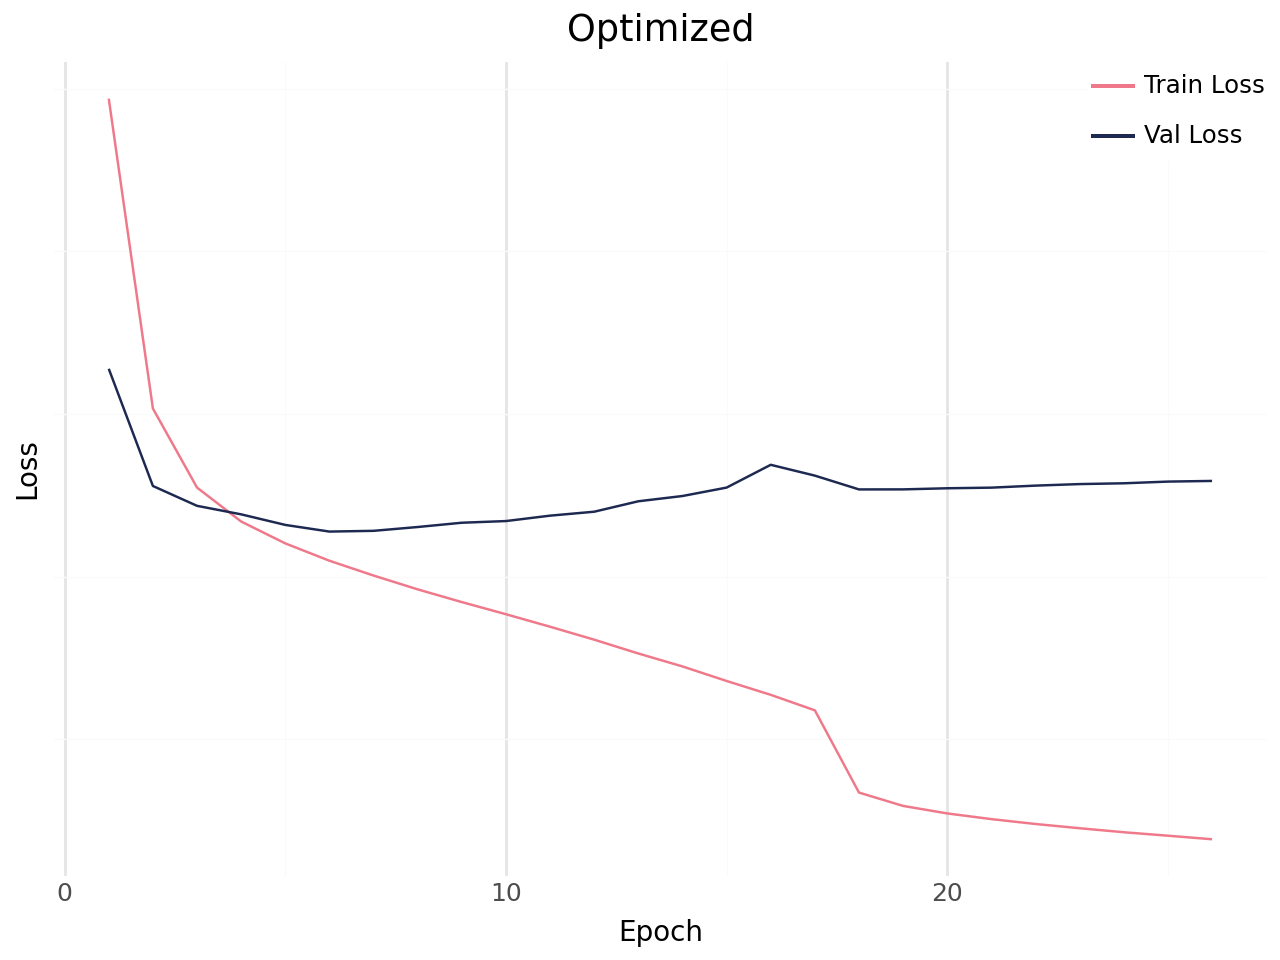

In [121]:
plot_D = (
    ggplot(data[data.model == "Optimized"], aes(x="epoch", y="loss", color="loss_type"))
    + geom_line()
    + scale_color_manual(values=[custom_colors[5], custom_colors[0]])
    + labs(title="Optimized", x="Epoch", y="Loss")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_y=element_blank(),
        legend_title=element_blank(),
        legend_position=(1, 1),
        legend_justification=(1, 1),
        legend_background=element_rect(fill="white", color="none"),
    )
)

plot_D.save("output/parts/model_fit_hyperparmeters_2.svg", dpi=300)
plot_D

In [78]:
data = (
    pd.concat(
        [
            epochs_model_1.assign(model="Standard"),
            epochs_model_2.assign(model="Optimized"),
        ]
    )
    .groupby(["model", "epoch"], as_index=False)
    .agg(mean_grad=("grad_norm", "mean"), std_grad=("grad_norm", "std"))
)

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/grad_norm_hyperparameters.svg


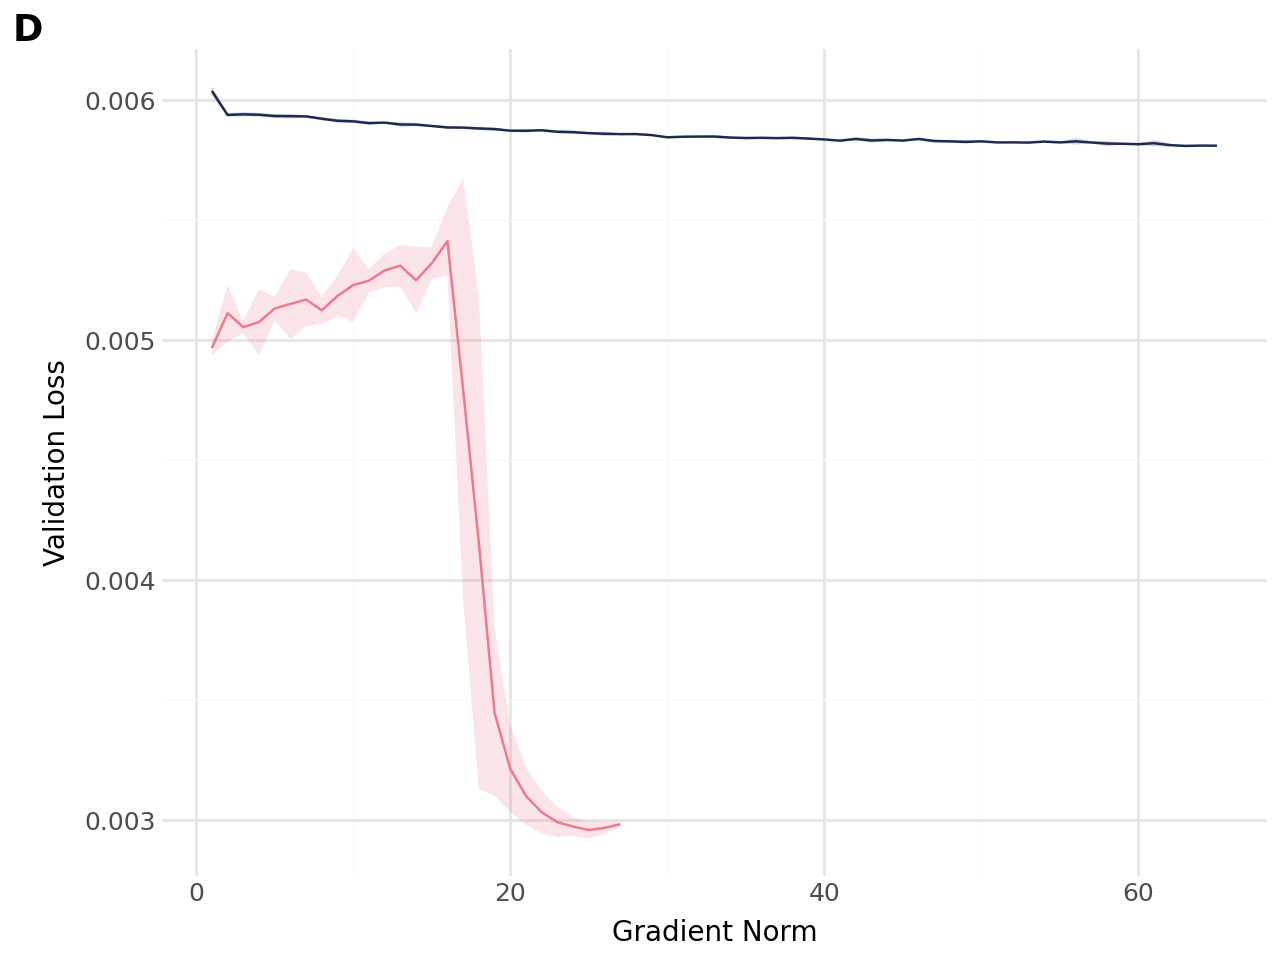

In [195]:
plot = (
    ggplot(data, aes(x="epoch", y="mean_grad", color="model", fill="model"))
    + geom_line()
    + geom_ribbon(
        aes(ymin="mean_grad-std_grad", ymax="mean_grad+std_grad"),
        alpha=0.2,
        color=None,
    )
    + scale_color_manual(values=[custom_colors[5], custom_colors[0]])
    + scale_fill_manual(values=[custom_colors[5], custom_colors[0]])
    + labs(tag="D", x="Gradient Norm", y="Validation Loss")
    + guides(fill="none", color="none")
    + figure_theme
)

plot.save("output/parts/grad_norm_hyperparameters.svg", dpi=300)
plot

## Seed Comparison

In [6]:
# Load data
summary = pd.read_feather("data/liver_imputation_v4_2_run_fold_summary.feather")
summary = summary.assign(seed="Initial")
summary

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained,seed
0,1,0.021749,0.024198,0.023810,27,Initial
1,2,0.021962,0.024151,0.023891,25,Initial
2,3,0.021861,0.024182,0.023867,26,Initial
3,4,0.021732,0.024190,0.023803,27,Initial
4,5,0.021885,0.024088,0.023777,26,Initial
5,6,0.021940,0.024094,0.023828,25,Initial


In [7]:
for i in range(1, 16):
    data = pd.read_feather(f"data/sc_imp_seed_{i}_run_fold_summary.feather")
    summary = pd.concat([summary, data.assign(seed=str(i))], ignore_index=True)

summary

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained,seed
0,1,0.021749,0.024198,0.023810,27,Initial
1,2,0.021962,0.024151,0.023891,25,Initial
2,3,0.021861,0.024182,0.023867,26,Initial
3,4,0.021732,0.024190,0.023803,27,Initial
4,5,0.021885,0.024088,0.023777,26,Initial
...,...,...,...,...,...,...
91,2,0.021742,0.024233,0.023851,27,15
92,3,0.021943,0.024065,0.023777,25,15
93,4,0.021855,0.024141,0.023816,26,15
94,5,0.021862,0.024212,0.023894,26,15


In [8]:
summary.seed.unique()

array(['Initial', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'], dtype=object)

In [9]:
idx = summary.groupby("seed")["min_val_loss"].idxmin()
data = summary.loc[idx]

data["seed"] = pd.Categorical(
    data["seed"],
    categories=["Initial"] + [str(i) for i in range(1, 16)],
    ordered=True,
)

data

,fold,final_train_loss,final_val_loss,min_val_loss,epochs_trained,seed
8,3,0.021632,0.024220,0.023795,28,1
62,3,0.021887,0.024060,0.023732,26,10
70,5,0.021761,0.024149,0.023764,27,11
76,5,0.021752,0.024134,0.023742,27,12
80,3,0.021887,0.024030,0.023712,26,13
86,3,0.021844,0.024089,0.023746,26,14
92,3,0.021943,0.024065,0.023777,25,15
17,6,0.021962,0.024063,0.023794,25,2
20,3,0.021738,0.024148,0.023753,27,3
28,5,0.021833,0.024119,0.023795,26,4


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/train_eval_seed_point.svg


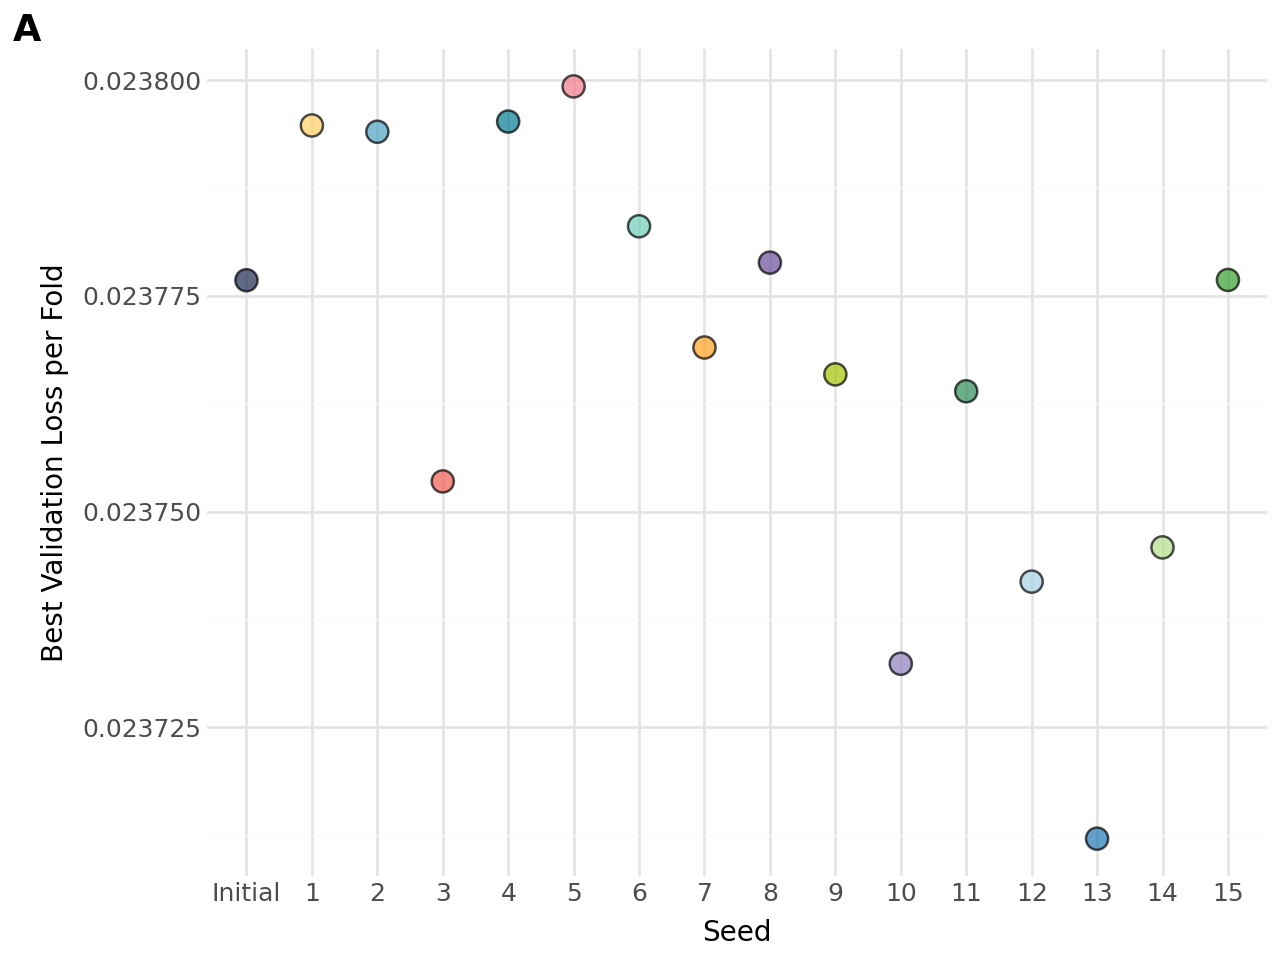

In [ ]:
plot = (
    ggplot(data, aes(x="seed", y="min_val_loss", fill="seed"))
    + geom_point(size=4, alpha=0.7)
    + scale_fill_manual(values=custom_colors_xl[:17])
    + labs(tag="A", x="Seed", y="Best Validation Loss per Fold")
    + guides(fill="none")
    + figure_theme
)

plot.save("output/parts/pointplot_train_eval_seed.svg", dpi=300)
plot

In [10]:
summary["seed"] = pd.Categorical(
    summary["seed"],
    categories=["Initial"] + [str(i) for i in range(1, 16)],
    ordered=True,
)

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/boxplot_train_eval_seed.svg


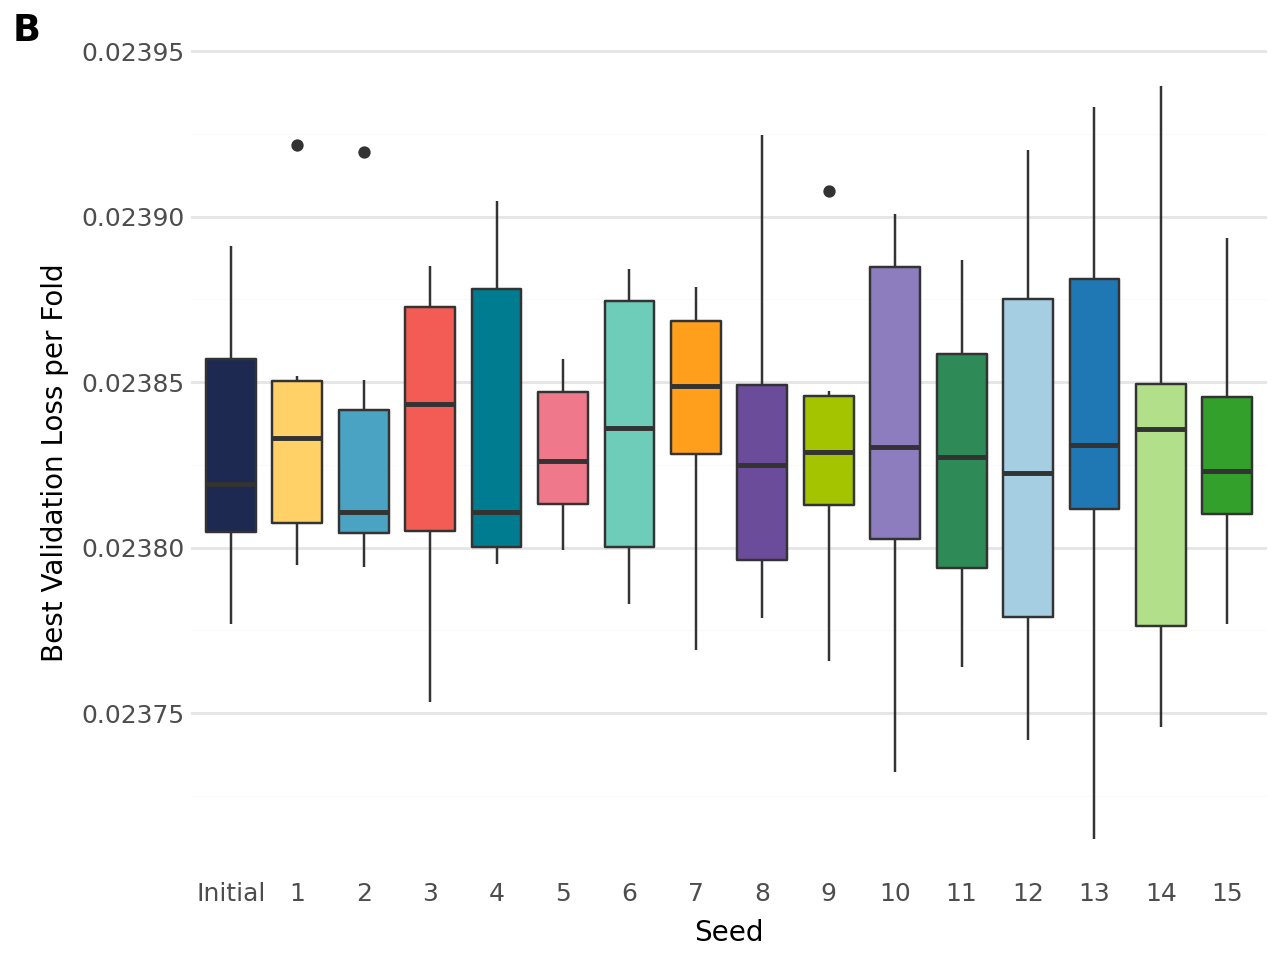

In [11]:
plot = (
    ggplot(summary, aes(x="seed", y="min_val_loss", fill="seed"))
    + geom_boxplot()
    + scale_fill_manual(values=custom_colors_xl[:16])
    + labs(tag="B", x="Seed", y="Best Validation Loss per Fold")
    + guides(fill="none")
    + figure_theme
    + theme(panel_grid_major_x=element_blank())
)

plot.save("output/parts/boxplot_train_eval_seed.svg", dpi=300)
plot

## Top 5 Model Comparison

In [74]:
data = pd.read_feather("data/train_data_sc_imp_seed_3_test_1_gene_wise_metrics.feather")
data = data.assign(model="Seed 3")
data.head()

,gene,pearson_correlation,spearman_correlation,target_mean,predicted_mean,mae,mse,rmse,target_sparsity,predicted_sparsity,sparsity_difference,model
0,Xkr4,0.581432,0.089450,0.004136,0.004296,0.012603,0.003447,0.058714,0.995972,0.0,0.995972,Seed 3
1,Gm1992,0.017226,0.009724,0.000023,0.000274,0.001560,0.000020,0.004486,0.999968,0.0,0.999968,Seed 3
2,Gm37381,0.008811,0.010623,0.000045,0.000316,0.001490,0.000035,0.005909,0.999935,0.0,0.999935,Seed 3
3,Rp1,0.191684,0.028280,0.000765,0.000983,0.004750,0.000527,0.022961,0.998896,0.0,0.998896,Seed 3
4,Sox17,0.596658,0.409565,0.069021,0.066840,0.095521,0.040220,0.200550,0.919901,0.0,0.919901,Seed 3


In [75]:
results = [10, 12, 13, 14]
for i in results:
    to_add = pd.read_feather(
        f"data/train_data_sc_imp_seed_{i}_test_1_gene_wise_metrics.feather"
    )
    data = pd.concat([data, to_add.assign(model=f"Seed {i}")], ignore_index=True)

data

,gene,pearson_correlation,spearman_correlation,target_mean,predicted_mean,mae,mse,rmse,target_sparsity,predicted_sparsity,sparsity_difference,model
0,Xkr4,0.581432,0.089450,0.004136,0.004296,0.012603,0.003447,0.058714,0.995972,0.0,0.995972,Seed 3
1,Gm1992,0.017226,0.009724,0.000023,0.000274,0.001560,0.000020,0.004486,0.999968,0.0,0.999968,Seed 3
2,Gm37381,0.008811,0.010623,0.000045,0.000316,0.001490,0.000035,0.005909,0.999935,0.0,0.999935,Seed 3
3,Rp1,0.191684,0.028280,0.000765,0.000983,0.004750,0.000527,0.022961,0.998896,0.0,0.998896,Seed 3
4,Sox17,0.596658,0.409565,0.069021,0.066840,0.095521,0.040220,0.200550,0.919901,0.0,0.919901,Seed 3
...,...,...,...,...,...,...,...,...,...,...,...,...
155260,AC168977.1,0.092434,0.022244,0.001298,0.001535,0.006026,0.001104,0.033226,0.998278,0.0,0.998278,Seed 14
155261,AC149090.1,0.652944,0.565899,0.422696,0.405310,0.332741,0.184470,0.429500,0.580310,0.0,0.580310,Seed 14
155262,CAAA01118383.1,0.298374,0.235533,0.101687,0.104243,0.161647,0.064377,0.253726,0.865593,0.0,0.865593,Seed 14
155263,Vmn2r122,NaN,NaN,0.000000,0.000154,0.001318,0.000003,0.001803,1.000000,0.0,1.000000,Seed 14


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/boxplot_pearson_top5_seeds.svg
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 34925 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 34925 rows containing non-finite values.


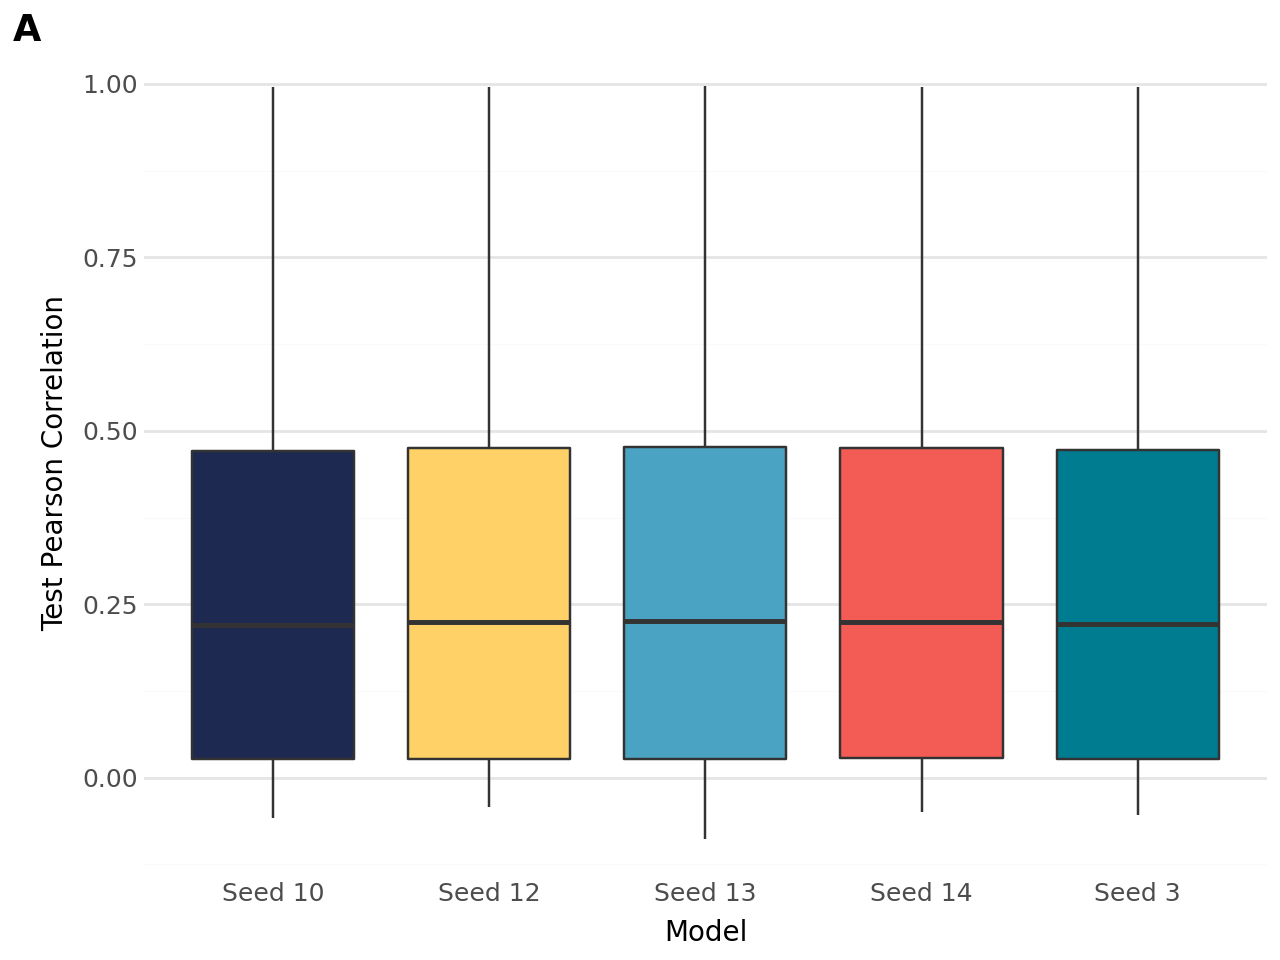

In [77]:
plot = (
    ggplot(data, aes(x="model", y="pearson_correlation", fill="model"))
    + geom_boxplot()
    + scale_fill_manual(values=custom_colors_xl[:5])
    + labs(tag="A", x="Model", y="Test Pearson Correlation")
    + guides(fill="none")
    + figure_theme
    + theme(panel_grid_major_x=element_blank())
)

plot.save("output/parts/boxplot_pearson_top5_seeds.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 34925 rows containing non-finite values.


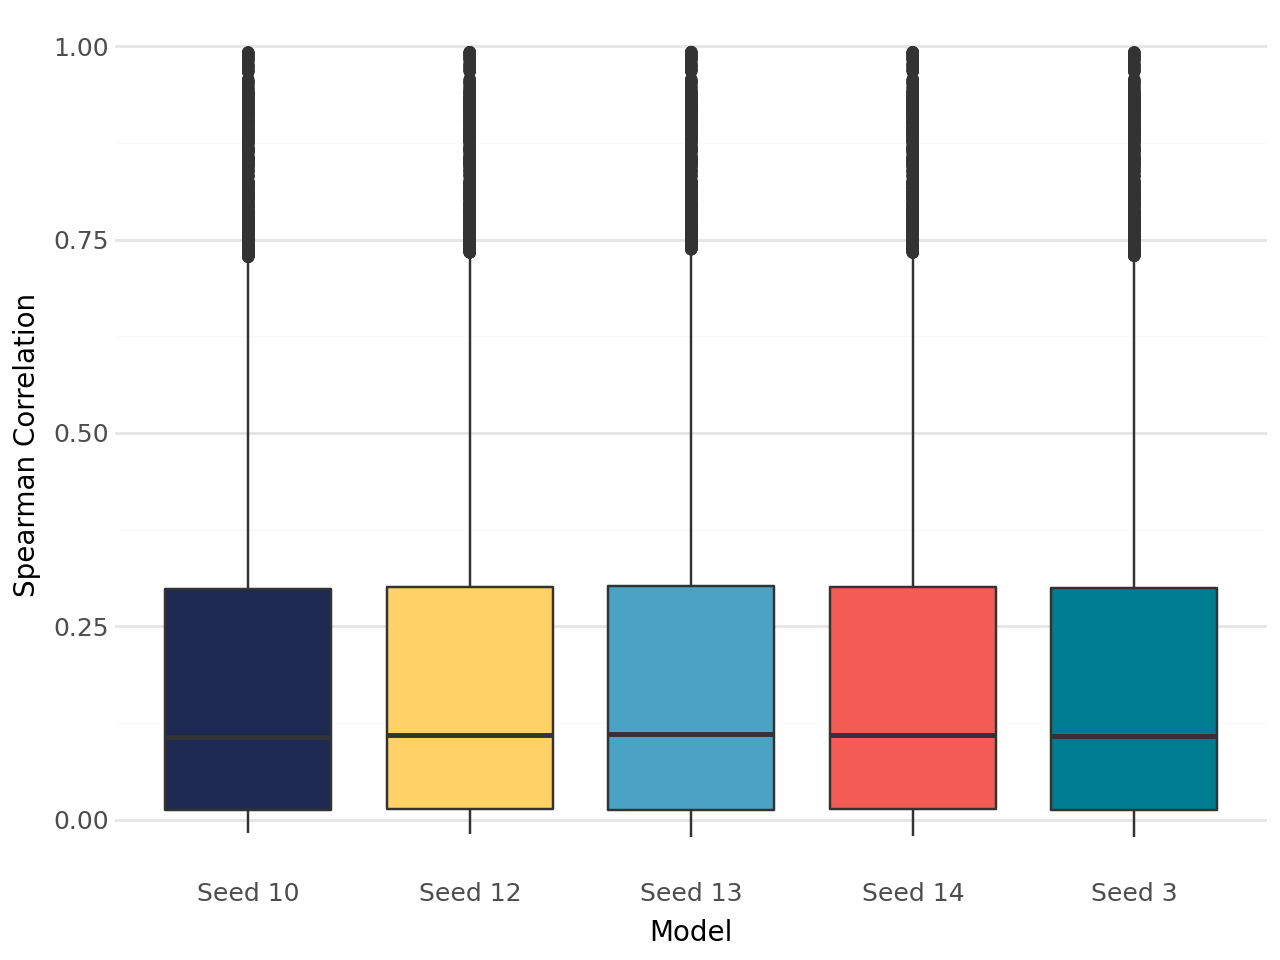

In [24]:
plot = (
    ggplot(data, aes(x="model", y="spearman_correlation", fill="model"))
    + geom_boxplot()
    + scale_fill_manual(values=custom_colors_xl[:5])
    + labs(x="Model", y="Spearman Correlation")
    + guides(fill="none")
    + figure_theme
    + theme(panel_grid_major_x=element_blank())
)

plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/boxplot_RMSE_top5_seeds.svg


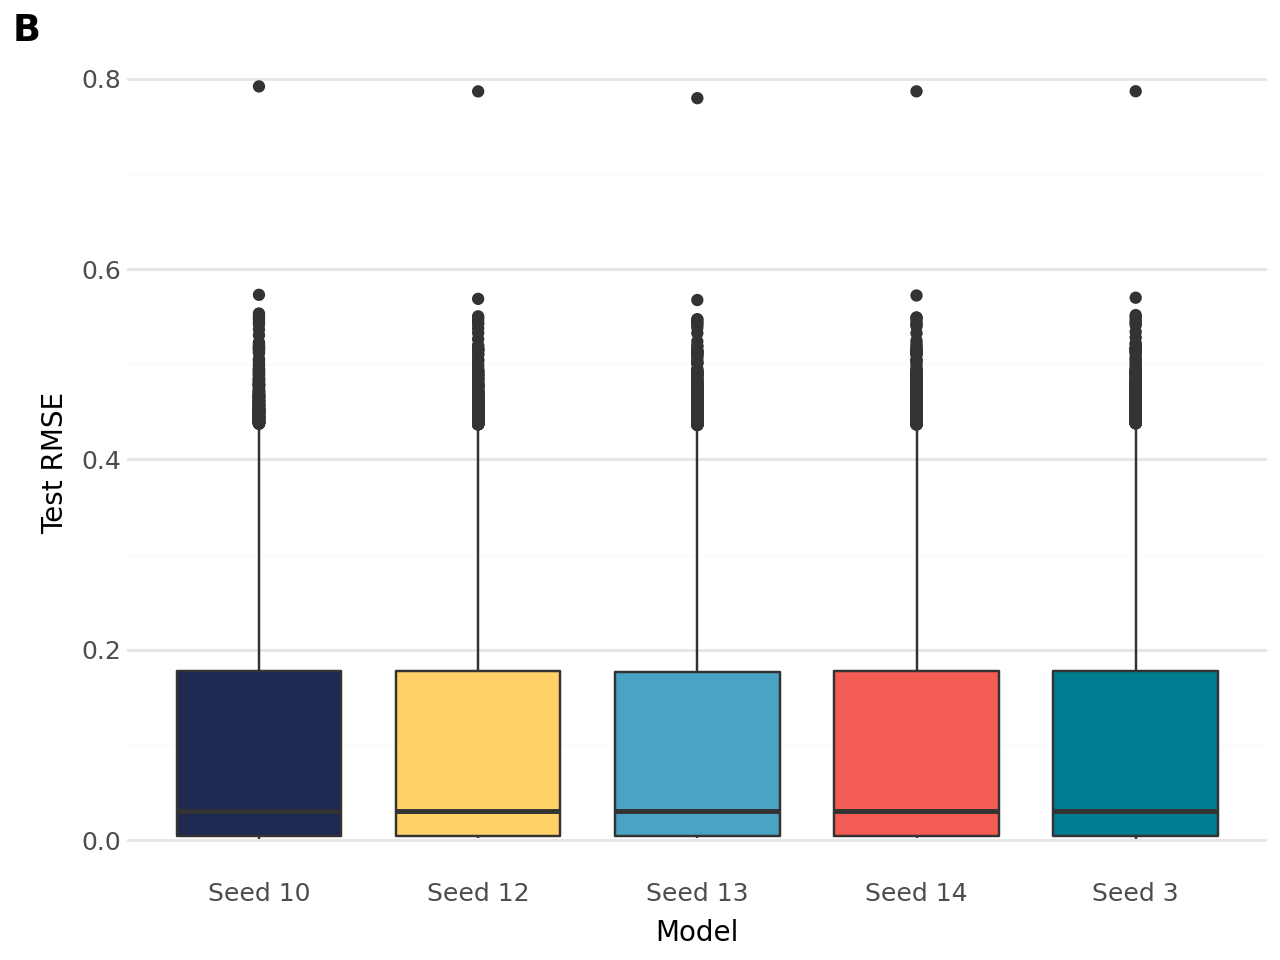

In [78]:
plot = (
    ggplot(data, aes(x="model", y="rmse", fill="model"))
    + geom_boxplot()
    + scale_fill_manual(values=custom_colors_xl[:5])
    + labs(tag="B", x="Model", y="Test RMSE")
    + guides(fill="none")
    + figure_theme
    + theme(panel_grid_major_x=element_blank())
)

plot.save("output/parts/boxplot_RMSE_top5_seeds.svg", dpi=300)
plot

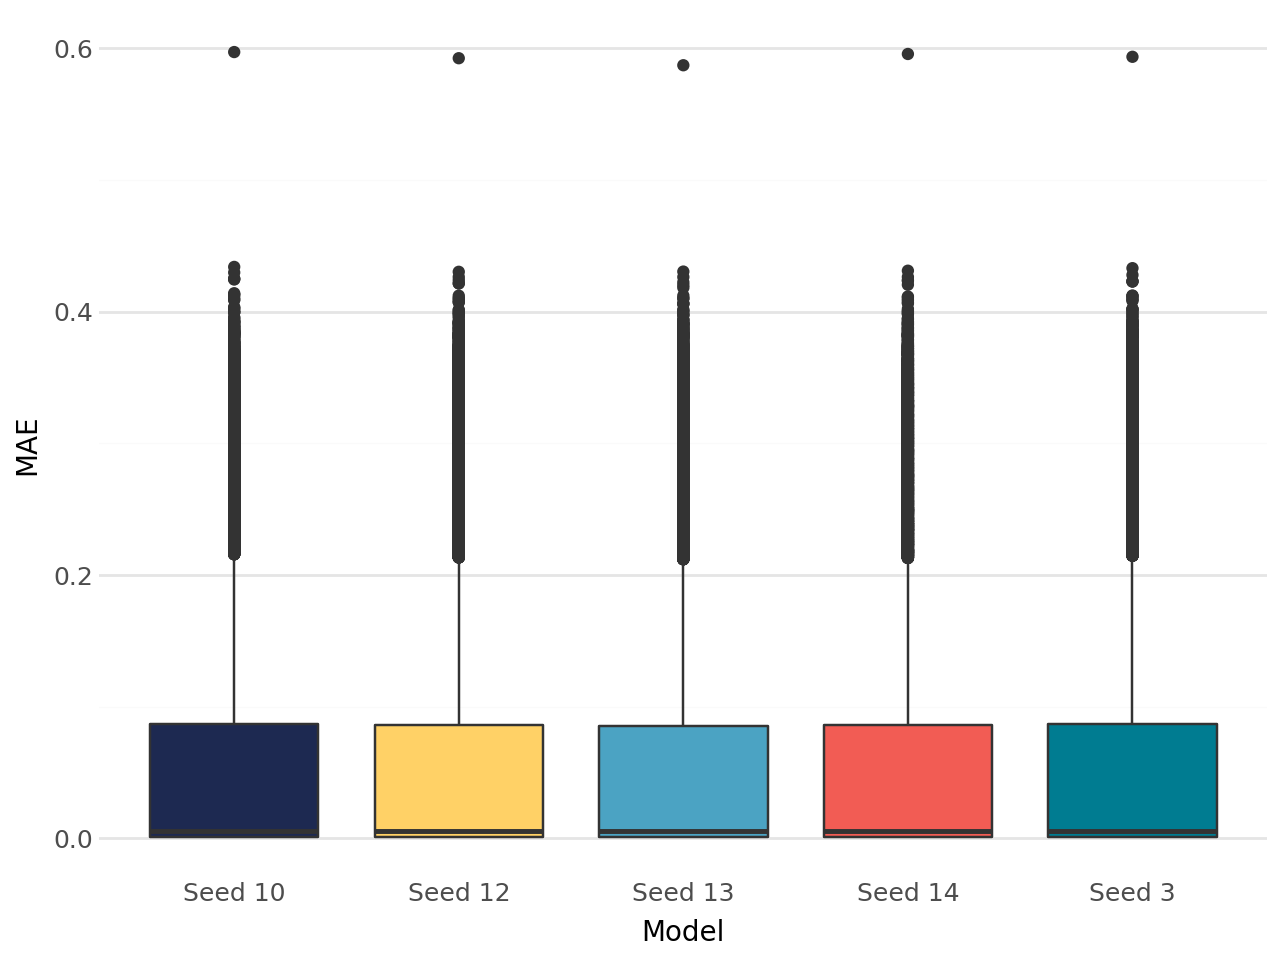

In [26]:
plot = (
    ggplot(data, aes(x="model", y="mae", fill="model"))
    + geom_boxplot()
    + scale_fill_manual(values=custom_colors_xl[:5])
    + labs(x="Model", y="MAE")
    + guides(fill="none")
    + figure_theme
    + theme(panel_grid_major_x=element_blank())
)

plot

## Best Model Results

### scRNA-seq Test Data

In [48]:
reconstruction = pd.read_feather(
    "data/test_data_sc_imp_seed_13_test_1_2025-08-20_02-13_gene_wise_metrics.feather"
)

reconstruction = reconstruction.drop(["spearman_correlation", "mae", "mse"], axis=1)
reconstruction

,gene,pearson_correlation,target_mean,predicted_mean,rmse,target_sparsity,predicted_sparsity,sparsity_difference
0,Atp6v1h,0.950332,0.188649,0.194044,0.113158,0.766687,0.0,0.766687
1,Oprk1,0.005244,0.000023,-0.000292,0.004634,0.999968,0.0,0.999968
2,Rb1cc1,0.963860,0.272591,0.273935,0.120116,0.694774,0.0,0.694774
3,Kcnq5,0.884047,0.015355,0.016464,0.068122,0.985773,0.0,0.985773
4,Rims1,0.160643,0.001004,0.001247,0.026547,0.998571,0.0,0.998571
...,...,...,...,...,...,...,...,...
926,Scd2,0.950738,0.140552,0.140226,0.105149,0.835450,0.0,0.835450
927,Btrc,0.944289,0.104679,0.107445,0.099478,0.877806,0.0,0.877806
928,Tcf7l2,0.979727,0.369323,0.362680,0.124801,0.673401,0.0,0.673401
929,Shtn1,0.957389,0.144052,0.143209,0.104678,0.841589,0.0,0.841589


In [49]:
recon_melted = reconstruction.melt(
    id_vars=[
        "gene",
        "target_mean",
        "predicted_mean",
        "target_sparsity",
        "predicted_sparsity",
        "sparsity_difference",
    ],
    var_name="metric",
    value_name="value",
)
recon_melted["metric"] = recon_melted["metric"].replace(
    {"pearson_correlation": "Pearson", "rmse": "RMSE"}
)

recon_melted

,gene,target_mean,predicted_mean,target_sparsity,predicted_sparsity,sparsity_difference,metric,value
0,Atp6v1h,0.188649,0.194044,0.766687,0.0,0.766687,Pearson,0.950332
1,Oprk1,0.000023,-0.000292,0.999968,0.0,0.999968,Pearson,0.005244
2,Rb1cc1,0.272591,0.273935,0.694774,0.0,0.694774,Pearson,0.963860
3,Kcnq5,0.015355,0.016464,0.985773,0.0,0.985773,Pearson,0.884047
4,Rims1,0.001004,0.001247,0.998571,0.0,0.998571,Pearson,0.160643
...,...,...,...,...,...,...,...,...
1857,Scd2,0.140552,0.140226,0.835450,0.0,0.835450,RMSE,0.105149
1858,Btrc,0.104679,0.107445,0.877806,0.0,0.877806,RMSE,0.099478
1859,Tcf7l2,0.369323,0.362680,0.673401,0.0,0.673401,RMSE,0.124801
1860,Shtn1,0.144052,0.143209,0.841589,0.0,0.841589,RMSE,0.104678


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/violin_reconstruction_metrics.svg
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 26 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 26 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 26 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnin

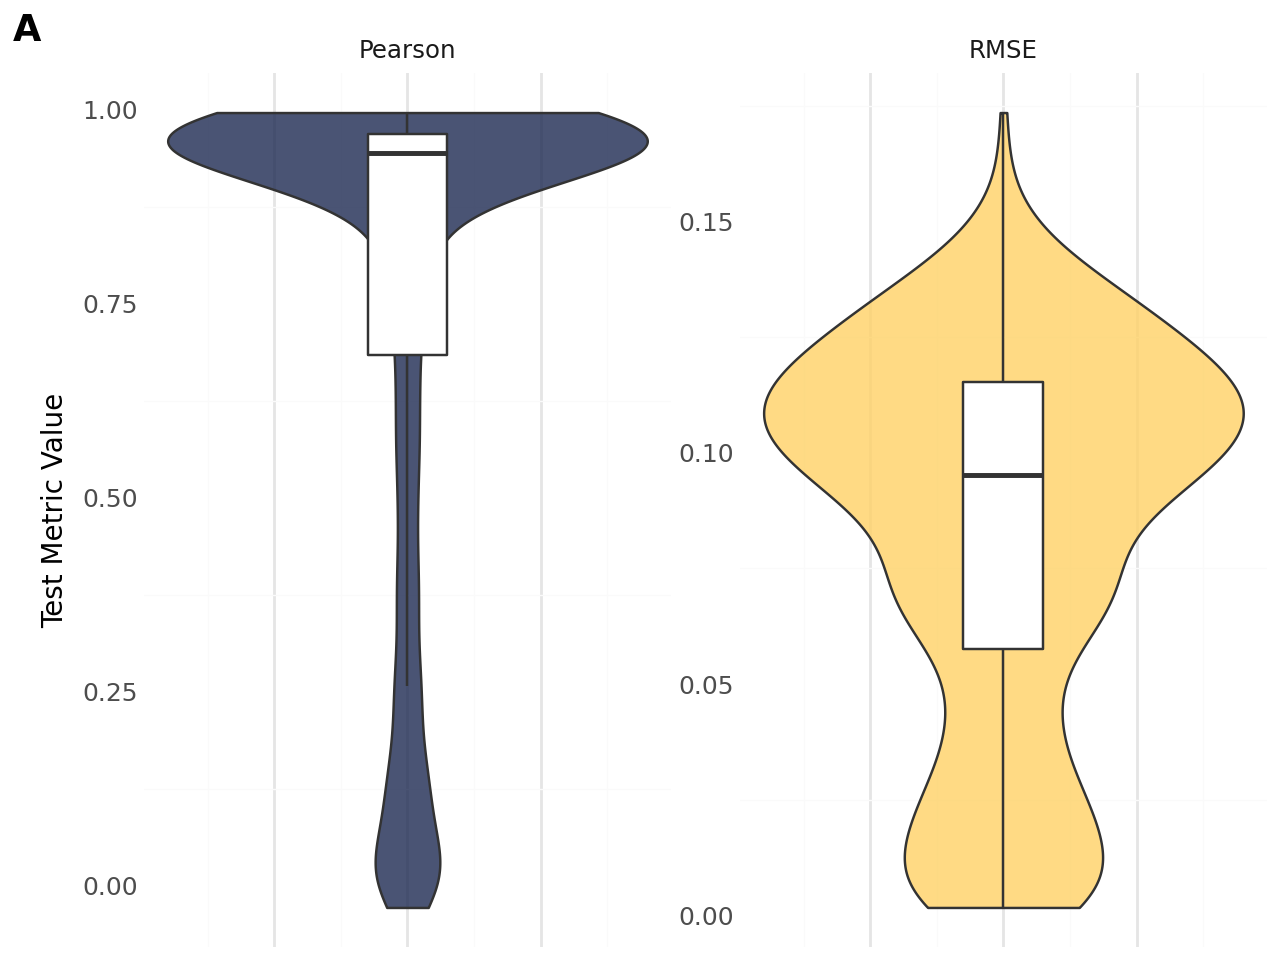

In [50]:
plot = (
    ggplot(recon_melted, aes(y="value", fill="metric"))
    + geom_violin(trim=False, alpha=0.8)
    + geom_boxplot(width=0.15, outlier_shape=None, fill="white")
    + scale_fill_manual(values=custom_colors[:2])
    + facet_wrap("~metric", scales="free_y")
    + guides(fill="none")
    + labs(tag="A", x="", y="Test Metric Value")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
    )
)

plot.save("output/parts/violin_reconstruction_metrics.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/scatter_reconstruction_metrics.svg
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 26 rows containing missing values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 26 rows containing missing values.


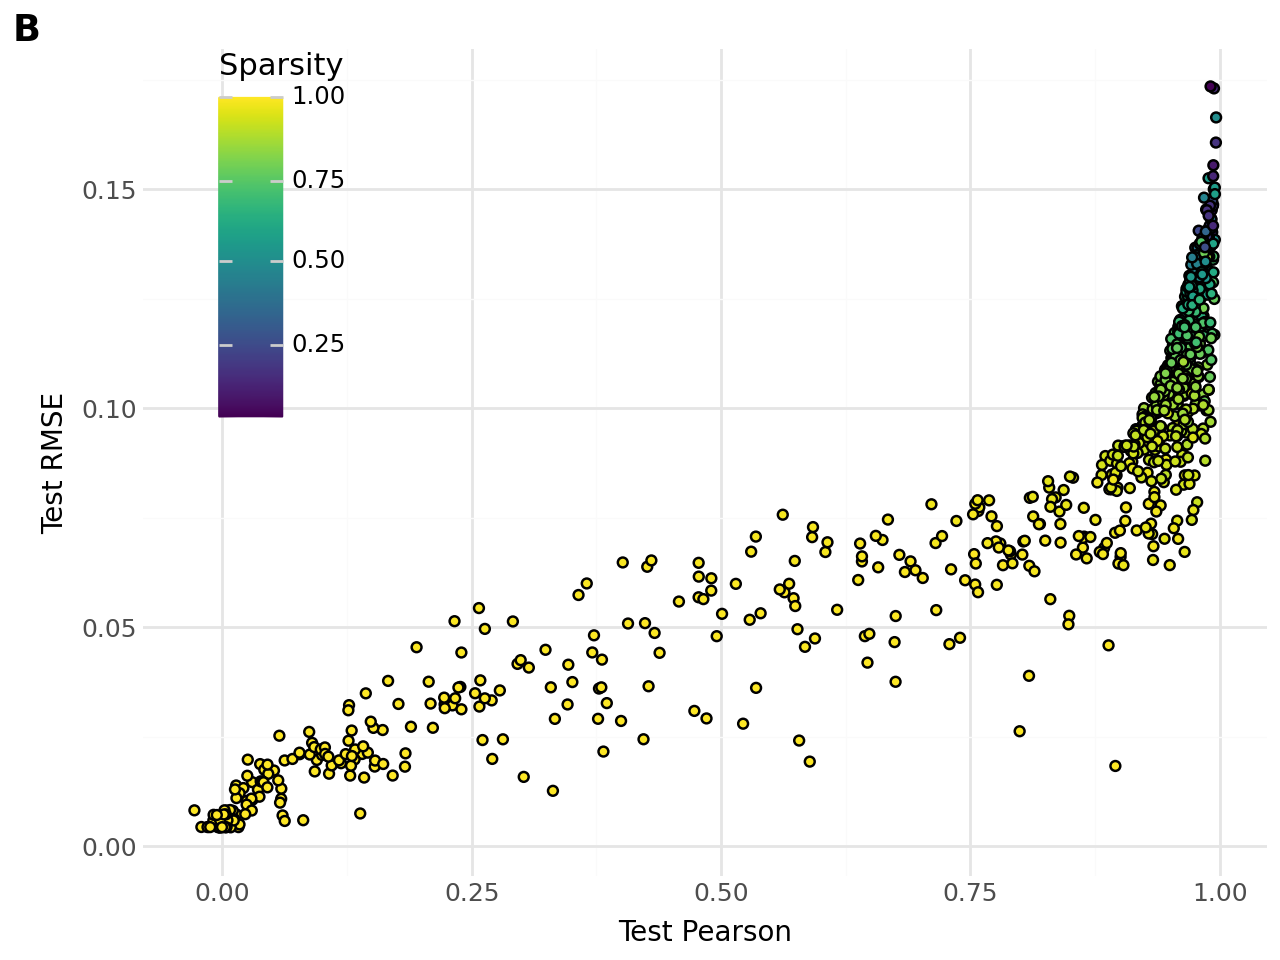

In [51]:
plot = (
    ggplot(
        reconstruction, aes(x="pearson_correlation", y="rmse", fill="target_sparsity")
    )
    + geom_point()
    + labs(tag="B", x="Test Pearson", y="Test RMSE", fill="Sparsity")
    + theme_minimal()
    + theme(
        plot_background=element_rect(fill="#ffffff", color="#ffffff"),
        plot_tag=element_text(face="bold"),
        axis_title=element_text(size=10, face="plain"),
        axis_text=element_text(size=9, face="plain"),
        text=element_text(family="DejaVu Sans"),
        legend_position=(0.1, 1),
        legend_justification=(0.3, 1),
    )
)

plot.save("output/parts/scatter_reconstruction_metrics.svg", dpi=300)
plot

### scRNA-seq All

In [6]:
prediction = pd.read_feather(
    "data/train_data_sc_imp_seed_13_test_1_gene_wise_metrics.feather"
)

prediction = prediction.drop(["spearman_correlation", "mae", "mse"], axis=1)
prediction

,gene,pearson_correlation,target_mean,predicted_mean,rmse,target_sparsity,predicted_sparsity,sparsity_difference
0,Xkr4,0.583422,0.004136,0.003829,0.058611,0.995972,0.0,0.995972
1,Gm1992,0.011724,0.000023,-0.000086,0.004558,0.999968,0.0,0.999968
2,Gm37381,0.000636,0.000045,0.000145,0.005949,0.999935,0.0,0.999935
3,Rp1,0.214788,0.000765,0.001893,0.022822,0.998896,0.0,0.998896
4,Sox17,0.597640,0.069021,0.069946,0.200360,0.919901,0.0,0.919901
...,...,...,...,...,...,...,...,...
31048,AC168977.1,0.122194,0.001298,0.002310,0.033056,0.998278,0.0,0.998278
31049,AC149090.1,0.655656,0.422696,0.411843,0.427911,0.580310,0.0,0.580310
31050,CAAA01118383.1,0.295908,0.101687,0.103152,0.253786,0.865593,0.0,0.865593
31051,Vmn2r122,NaN,0.000000,0.000029,0.001787,1.000000,0.0,1.000000


In [16]:
pred_melted = prediction.melt(
    id_vars=[
        "gene",
        "target_mean",
        "predicted_mean",
        "target_sparsity",
        "predicted_sparsity",
        "sparsity_difference",
    ],
    var_name="metric",
    value_name="value",
)

pred_melted["metric"] = pred_melted["metric"].replace(
    {"pearson_correlation": "Pearson", "rmse": "RMSE"}
)

pred_melted

,gene,target_mean,predicted_mean,target_sparsity,predicted_sparsity,sparsity_difference,metric,value
0,Xkr4,0.004136,0.003829,0.995972,0.0,0.995972,Pearson,0.583422
1,Gm1992,0.000023,-0.000086,0.999968,0.0,0.999968,Pearson,0.011724
2,Gm37381,0.000045,0.000145,0.999935,0.0,0.999935,Pearson,0.000636
3,Rp1,0.000765,0.001893,0.998896,0.0,0.998896,Pearson,0.214788
4,Sox17,0.069021,0.069946,0.919901,0.0,0.919901,Pearson,0.597640
...,...,...,...,...,...,...,...,...
62101,AC168977.1,0.001298,0.002310,0.998278,0.0,0.998278,RMSE,0.033056
62102,AC149090.1,0.422696,0.411843,0.580310,0.0,0.580310,RMSE,0.427911
62103,CAAA01118383.1,0.101687,0.103152,0.865593,0.0,0.865593,RMSE,0.253786
62104,Vmn2r122,0.000000,0.000029,1.000000,0.0,1.000000,RMSE,0.001787


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/violin_prediction_metrics.svg
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 6985 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 6985 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 6985 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotn

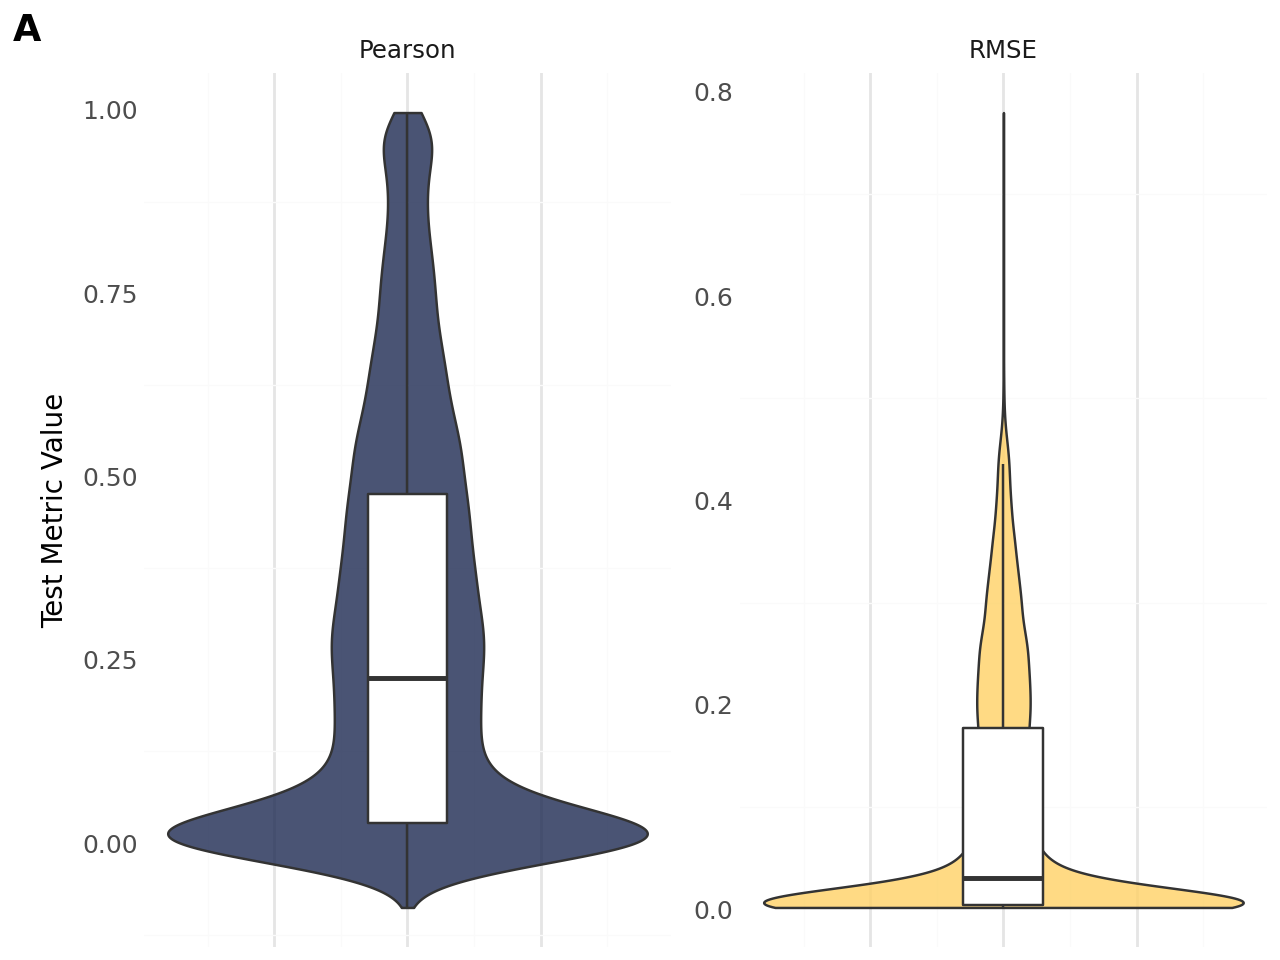

In [71]:
plot = (
    ggplot(pred_melted, aes(y="value", fill="metric"))
    + geom_violin(trim=False, alpha=0.8)
    + geom_boxplot(width=0.15, outlier_shape=None, fill="white")
    + scale_fill_manual(values=custom_colors[:2])
    + facet_wrap("~metric", scales="free_y")
    + guides(fill="none")
    + labs(tag="A", x="", y="Test Metric Value")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
    )
)

plot.save("output/parts/violin_prediction_metrics.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/scatter_prediction_metrics.svg
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 6985 rows containing missing values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 6985 rows containing missing values.


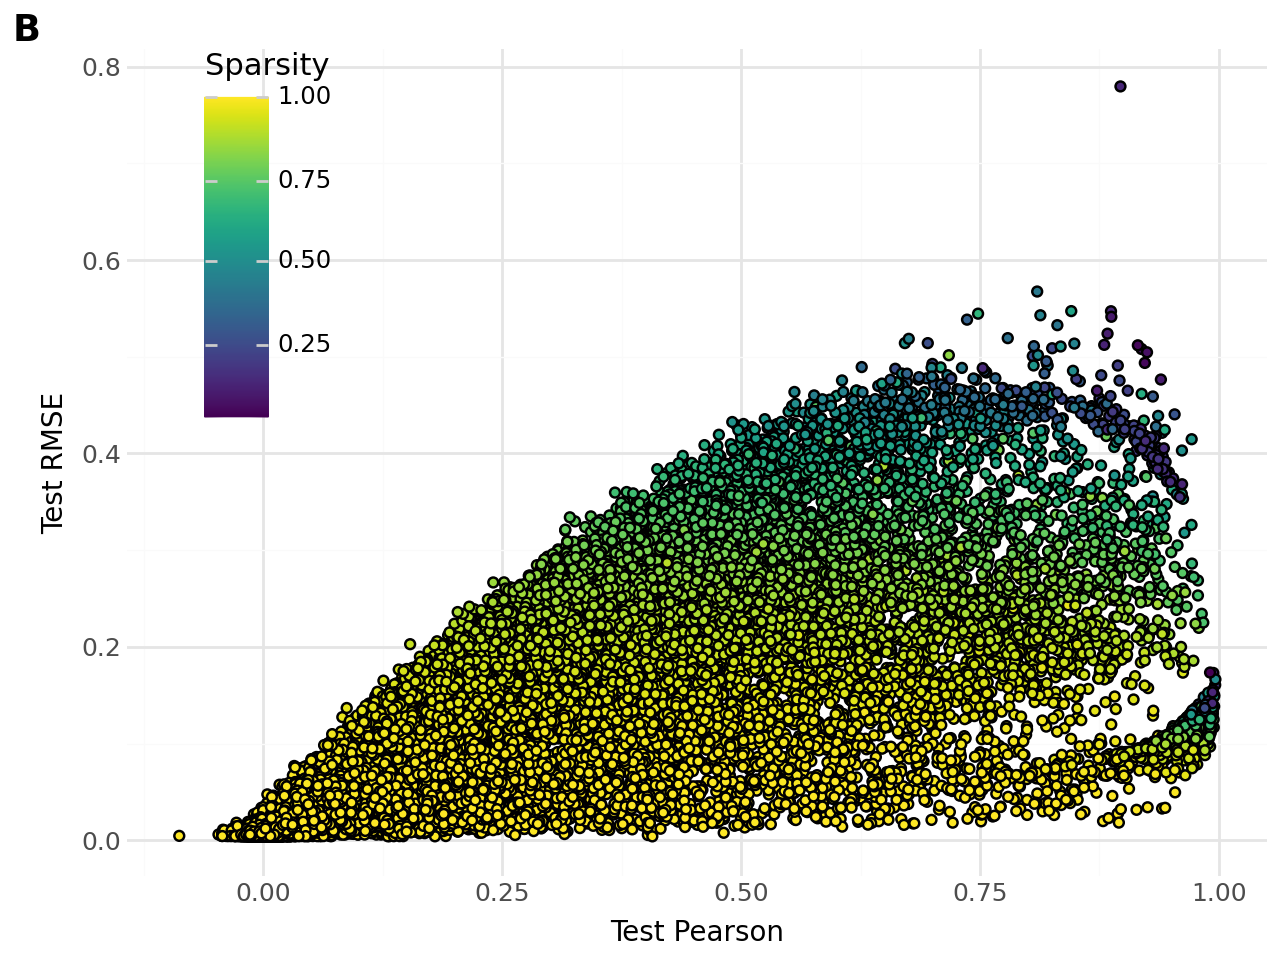

In [79]:
plot = (
    ggplot(prediction, aes(x="pearson_correlation", y="rmse", fill="target_sparsity"))
    + geom_point(raster=True)
    + labs(tag="B", x="Test Pearson", y="Test RMSE", fill="Sparsity")
    + theme_minimal()
    + theme(
        plot_background=element_rect(fill="#ffffff", color="#ffffff"),
        plot_tag=element_text(face="bold"),
        axis_title=element_text(size=10, face="plain"),
        axis_text=element_text(size=9, face="plain"),
        text=element_text(family="DejaVu Sans"),
        legend_position=(0.1, 1),
        legend_justification=(0.3, 1),
    )
)

plot.save("output/parts/scatter_prediction_metrics.svg", dpi=300)
plot

### Threshold Cutoff to 0

In [7]:
data = pd.read_feather(
    "data/train_data_sc_imp_seed_13_test_1_2025-08-20_02-13_threshold_gene_metrics.feather"
)

data = data.drop(["spearman_correlation", "mae", "mse"], axis=1)
data_melted = data.melt(
    id_vars=[
        "gene",
        "target_mean",
        "predicted_mean",
        "target_sparsity",
        "predicted_sparsity",
        "sparsity_difference",
    ],
    var_name="metric",
    value_name="value",
)
data_melted["metric"] = data_melted["metric"].replace(
    {"pearson_correlation": "Pearson", "rmse": "RMSE"}
)

data

,gene,pearson_correlation,target_mean,predicted_mean,rmse,target_sparsity,predicted_sparsity,sparsity_difference
0,Xkr4,0.601113,0.004136,0.003223,0.057750,0.995972,0.986260,0.009712
1,Gm1992,NaN,0.000023,0.000000,0.003950,0.999968,1.000000,0.000032
2,Gm37381,NaN,0.000045,0.000000,0.005587,0.999935,1.000000,0.000065
3,Rp1,0.260436,0.000765,0.000305,0.022245,0.998896,0.997369,0.001527
4,Sox17,0.602381,0.069021,0.069973,0.199449,0.919901,0.732842,0.187059
...,...,...,...,...,...,...,...,...
31048,AC168977.1,0.182350,0.001298,0.000110,0.032658,0.998278,0.998961,0.000682
31049,AC149090.1,0.655560,0.422696,0.410629,0.428000,0.580310,0.081755,0.498555
31050,CAAA01118383.1,0.292903,0.101687,0.095889,0.254567,0.865593,0.307987,0.557605
31051,Vmn2r122,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000


In [8]:
sparsity = prediction[["target_sparsity", "predicted_sparsity"]]
sparsity = sparsity.rename(columns={"predicted_sparsity": "Before Cutoff"})
sparsity["After Cutoff"] = data["predicted_sparsity"]

sparsity = sparsity.melt(
    id_vars=["target_sparsity"],
    var_name="scope",
    value_name="value",
)

sparsity

,target_sparsity,scope,value
0,0.995972,Before Cutoff,0.000000
1,0.999968,Before Cutoff,0.000000
2,0.999935,Before Cutoff,0.000000
3,0.998896,Before Cutoff,0.000000
4,0.919901,Before Cutoff,0.000000
...,...,...,...
62101,0.998278,After Cutoff,0.998961
62102,0.580310,After Cutoff,0.081755
62103,0.865593,After Cutoff,0.307987
62104,1.000000,After Cutoff,1.000000


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/scatter_prediction_sparsity.svg


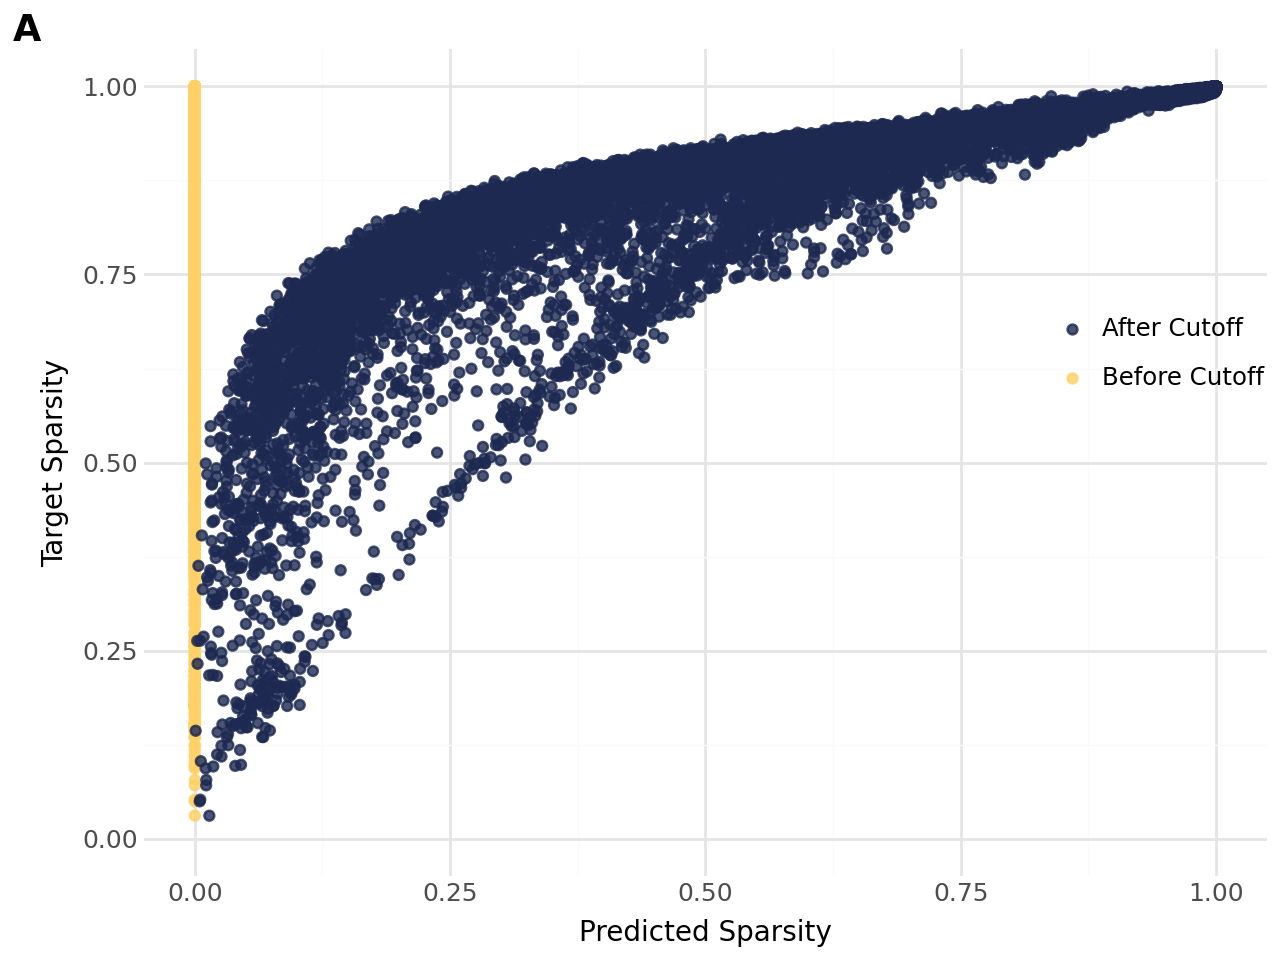

In [10]:
plot = (
    ggplot(sparsity, aes(x="value", y="target_sparsity", color="scope", fill="scope"))
    + geom_point(alpha=0.8, raster=True)
    + coord_cartesian(xlim=(0, 1), ylim=(0, 1))
    + scale_color_manual(values=custom_colors[:2])
    + scale_fill_manual(values=custom_colors[:2])
    + labs(tag="A", x="Predicted Sparsity", y="Target Sparsity")
    + figure_theme
    + theme(legend_position=(1, 0.65))
)

plot.save("output/parts/scatter_prediction_sparsity.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/violin_prediction_threshold_metrics.svg
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 12516 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 12516 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 12516 rows containing non-finite values.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-p

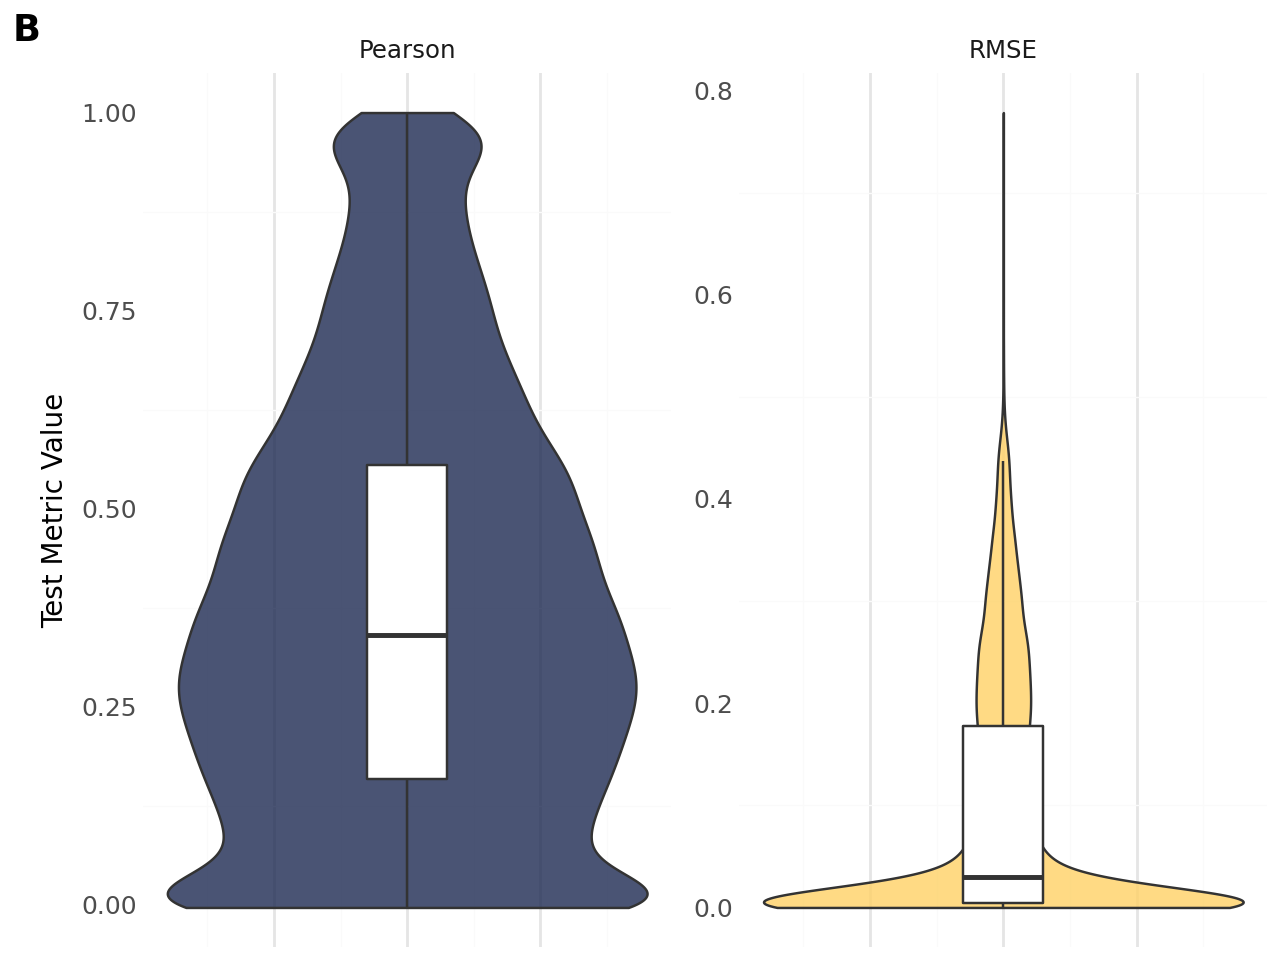

In [18]:
plot = (
    ggplot(data_melted, aes(y="value", fill="metric"))
    + geom_violin(trim=False, alpha=0.8)
    + geom_boxplot(width=0.15, outlier_shape=None, fill="white")
    + scale_fill_manual(values=custom_colors[:2])
    + facet_wrap("~metric", scales="free_y")
    + guides(fill="none")
    + labs(tag="B", x="", y="Test Metric Value")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
    )
)

plot.save("output/parts/violin_prediction_threshold_metrics.svg", dpi=300)
plot

### Baseline Comparison

In [54]:
baseline = pd.read_feather(
    "data/train_data_sc_imp_seed_13_test_1_2025-08-20_02-13_baseline_gene_metrics.feather"
)

baseline

,gene_name,pearson_correlation,spearman_correlation,mae,mse,rmse,target_sparsity,predicted_sparsity,sparsity_difference
0,Xkr4,NaN,NaN,0.011364,0.001749,0.041825,0.0,0.0,0.0
1,Gm1992,NaN,NaN,0.001606,0.000005,0.002321,0.0,0.0,0.0
2,Gm37381,NaN,NaN,0.001470,0.000004,0.002047,0.0,0.0,0.0
3,Rp1,NaN,NaN,0.004012,0.000077,0.008764,0.0,0.0,0.0
4,Sox17,NaN,NaN,0.102709,0.023219,0.152376,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
31048,AC168977.1,NaN,NaN,0.004611,0.000055,0.007382,0.0,0.0,0.0
31049,AC149090.1,NaN,NaN,0.283261,0.139783,0.373875,0.0,0.0,0.0
31050,CAAA01118383.1,NaN,NaN,0.065627,0.008570,0.092576,0.0,0.0,0.0
31051,Vmn2r122,NaN,NaN,0.001305,0.000003,0.001787,1.0,0.0,1.0


In [64]:
data = prediction[["rmse", "target_sparsity"]]
data = data.rename(columns={"rmse": "prediction"})
data["baseline"] = baseline["rmse"]

data_melted = data.melt(
    id_vars=["target_sparsity"],
    var_name="scope",
    value_name="value",
)
data_melted["scope"] = data_melted["scope"].replace(
    {"prediction": "Model", "baseline": "Baseline"}
)

data

,prediction,target_sparsity,baseline
0,0.058611,0.995972,0.041825
1,0.004558,0.999968,0.002321
2,0.005949,0.999935,0.002047
3,0.022822,0.998896,0.008764
4,0.200360,0.919901,0.152376
...,...,...,...
31048,0.033056,0.998278,0.007382
31049,0.427911,0.580310,0.373875
31050,0.253786,0.865593,0.092576
31051,0.001787,1.000000,0.001787


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/baseline_comparison.svg


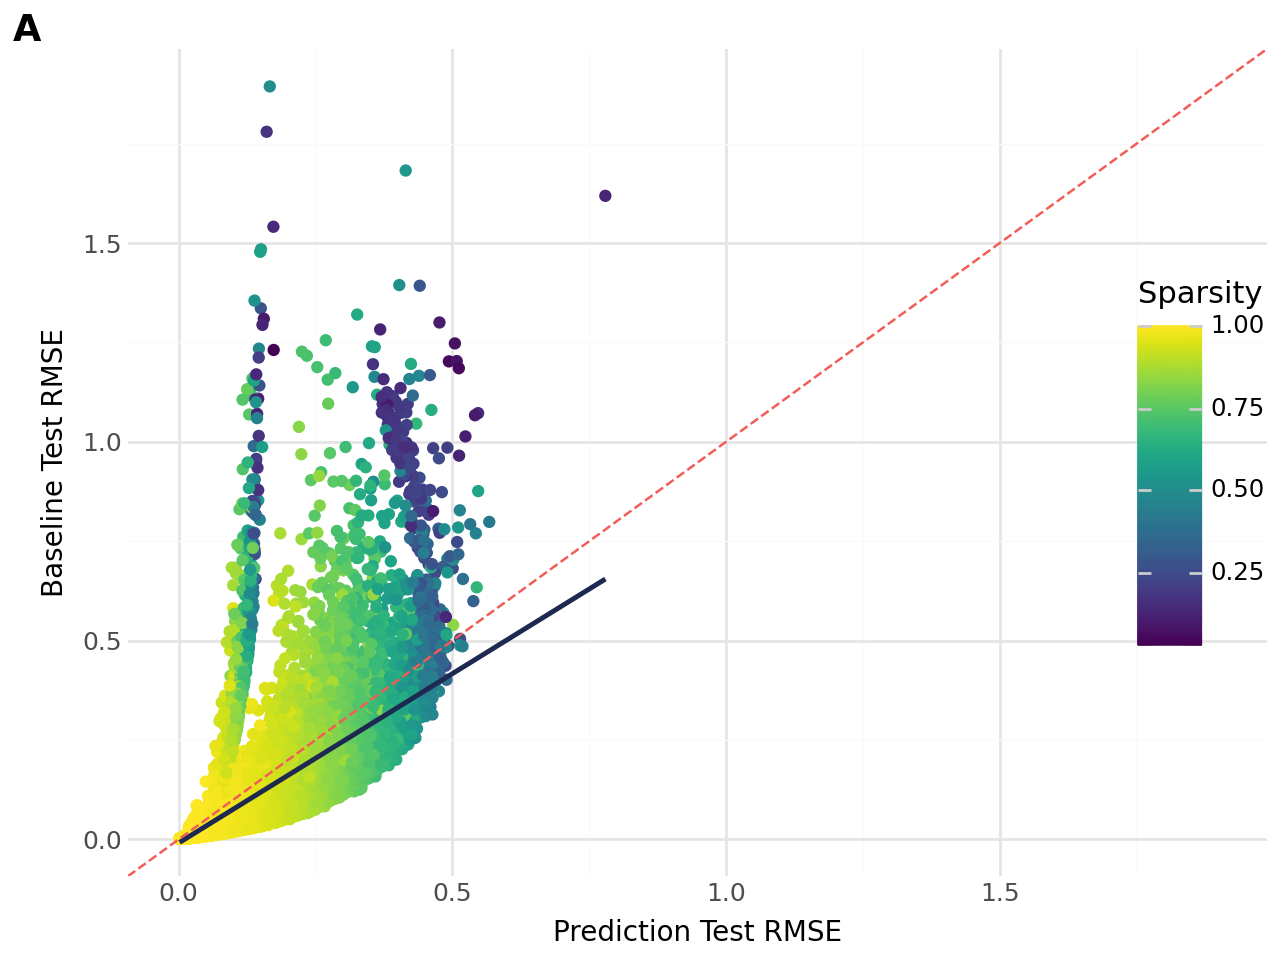

In [58]:
min_val = min(data["prediction"].min(), data["baseline"].min())
max_val = max(data["prediction"].max(), data["baseline"].max())

plot = (
    ggplot(
        data,
        aes(
            x="prediction",
            y="baseline",
            color="target_sparsity",
            fill="target_sparsity",
        ),
    )
    + geom_point(raster=True)
    + geom_smooth(color="#1D2951")
    + geom_abline(slope=1, intercept=0, linetype="dashed", color="#F25C54")
    + coord_cartesian(xlim=(min_val, max_val), ylim=(min_val, max_val))
    + labs(
        tag="A",
        x="Prediction Test RMSE",
        y="Baseline Test RMSE",
        color="Sparsity",
        fill="Sparsity",
    )
    + theme_minimal()
    + theme(
        plot_background=element_rect(fill="#ffffff", color="#ffffff"),
        plot_tag=element_text(face="bold"),
        axis_title=element_text(size=10, face="plain"),
        axis_text=element_text(size=9, face="plain"),
        text=element_text(family="DejaVu Sans"),
        legend_position=(1, 0.5),
    )
)

plot.save("output/parts/baseline_comparison.svg", dpi=300)
plot

In [65]:
data_melted

,target_sparsity,scope,value
0,0.995972,Model,0.058611
1,0.999968,Model,0.004558
2,0.999935,Model,0.005949
3,0.998896,Model,0.022822
4,0.919901,Model,0.200360
...,...,...,...
62101,0.998278,Baseline,0.007382
62102,0.580310,Baseline,0.373875
62103,0.865593,Baseline,0.092576
62104,1.000000,Baseline,0.001787


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/violin_baseline_comparison.svg


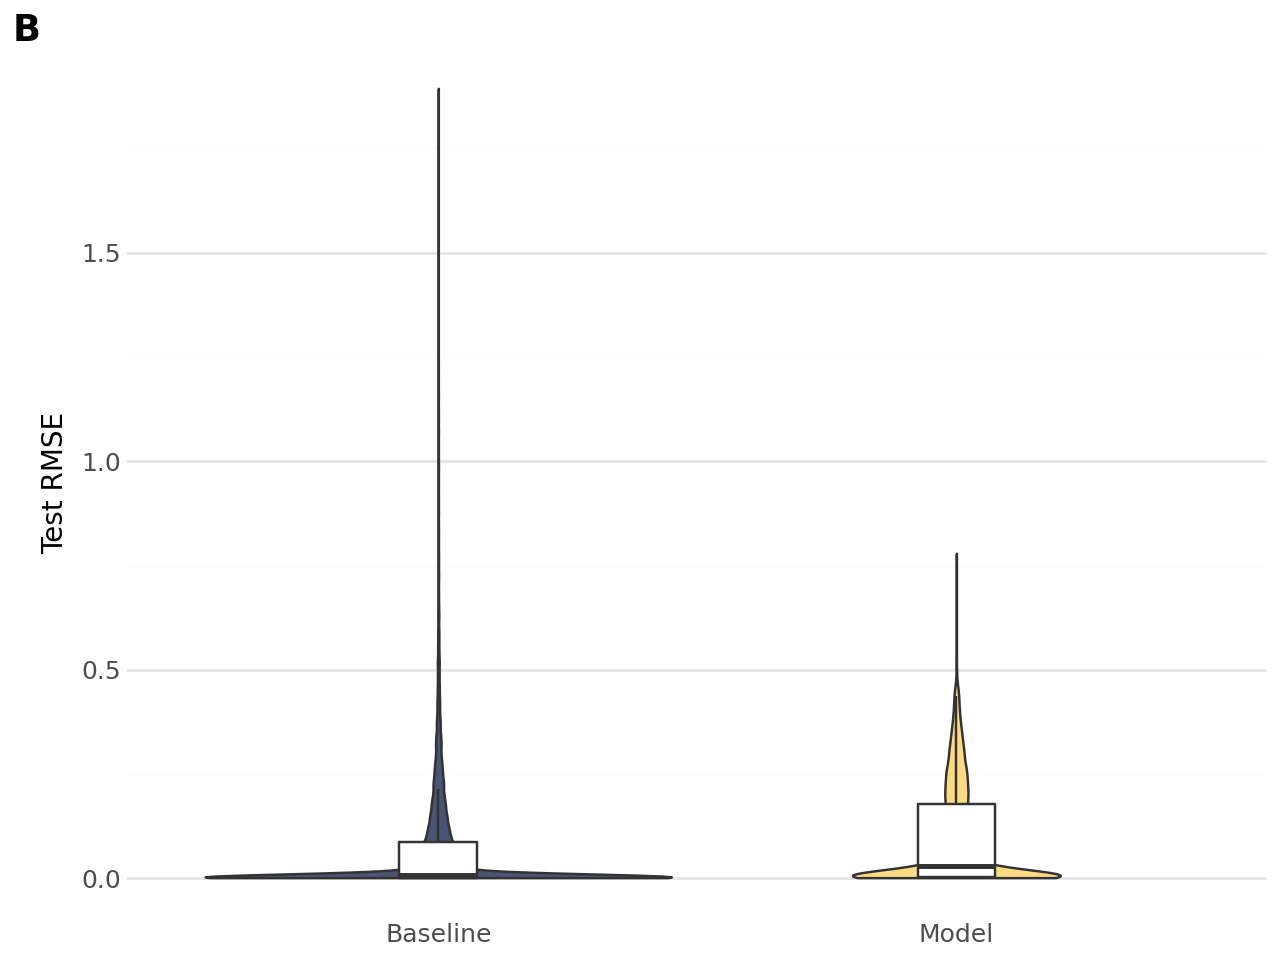

In [66]:
plot = (
    ggplot(data_melted, aes(x="scope", y="value", fill="scope"))
    + geom_violin(alpha=0.8)
    + geom_boxplot(width=0.15, outlier_shape=None, fill="white")
    + scale_fill_manual(values=custom_colors[:2])
    + guides(fill="none")
    + labs(tag="B", x="", y="Test RMSE")
    + figure_theme
    + theme(panel_grid_major_x=element_blank())
)

plot.save("output/parts/violin_baseline_comparison.svg", dpi=300)
plot

### ST Test Data

In [53]:
reconstruction = pd.read_feather(
    "data/test_data_sc_imp_seed_13_test_2_2025-08-20_02-13_gene_wise_metrics.feather"
)

reconstruction = reconstruction.drop(["spearman_correlation", "mae", "mse"], axis=1)
reconstruction

,gene,pearson_correlation,target_mean,predicted_mean,rmse,target_sparsity,predicted_sparsity,sparsity_difference
0,Atp6v1h,0.149384,0.174320,0.302079,0.526917,0.781913,0.0,0.781913
1,Oprk1,-0.147197,0.397779,-0.001658,0.638363,0.566763,0.0,0.566763
2,Rb1cc1,0.098241,0.092209,0.279485,0.498697,0.879369,0.0,0.879369
3,Kcnq5,0.100806,0.153178,0.014985,0.357475,0.808114,0.0,0.808114
4,Rims1,0.124132,0.054047,0.010213,0.200734,0.927329,0.0,0.927329
...,...,...,...,...,...,...,...,...
926,Scd2,0.065562,0.069413,0.205358,0.376617,0.907885,0.0,0.907885
927,Btrc,0.103479,0.119998,0.139101,0.383759,0.847916,0.0,0.847916
928,Tcf7l2,0.121290,0.140898,0.323854,0.531408,0.823545,0.0,0.823545
929,Shtn1,0.076362,0.112149,0.287792,0.525949,0.871063,0.0,0.871063


In [54]:
recon_melted = reconstruction.melt(
    id_vars=[
        "gene",
        "target_mean",
        "predicted_mean",
        "target_sparsity",
        "predicted_sparsity",
        "sparsity_difference",
    ],
    var_name="metric",
    value_name="value",
)
recon_melted["metric"] = recon_melted["metric"].replace(
    {"pearson_correlation": "Pearson", "rmse": "RMSE"}
)

recon_melted

,gene,target_mean,predicted_mean,target_sparsity,predicted_sparsity,sparsity_difference,metric,value
0,Atp6v1h,0.174320,0.302079,0.781913,0.0,0.781913,Pearson,0.149384
1,Oprk1,0.397779,-0.001658,0.566763,0.0,0.566763,Pearson,-0.147197
2,Rb1cc1,0.092209,0.279485,0.879369,0.0,0.879369,Pearson,0.098241
3,Kcnq5,0.153178,0.014985,0.808114,0.0,0.808114,Pearson,0.100806
4,Rims1,0.054047,0.010213,0.927329,0.0,0.927329,Pearson,0.124132
...,...,...,...,...,...,...,...,...
1857,Scd2,0.069413,0.205358,0.907885,0.0,0.907885,RMSE,0.376617
1858,Btrc,0.119998,0.139101,0.847916,0.0,0.847916,RMSE,0.383759
1859,Tcf7l2,0.140898,0.323854,0.823545,0.0,0.823545,RMSE,0.531408
1860,Shtn1,0.112149,0.287792,0.871063,0.0,0.871063,RMSE,0.525949


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/violin_ST_reconstruction-metrics.svg


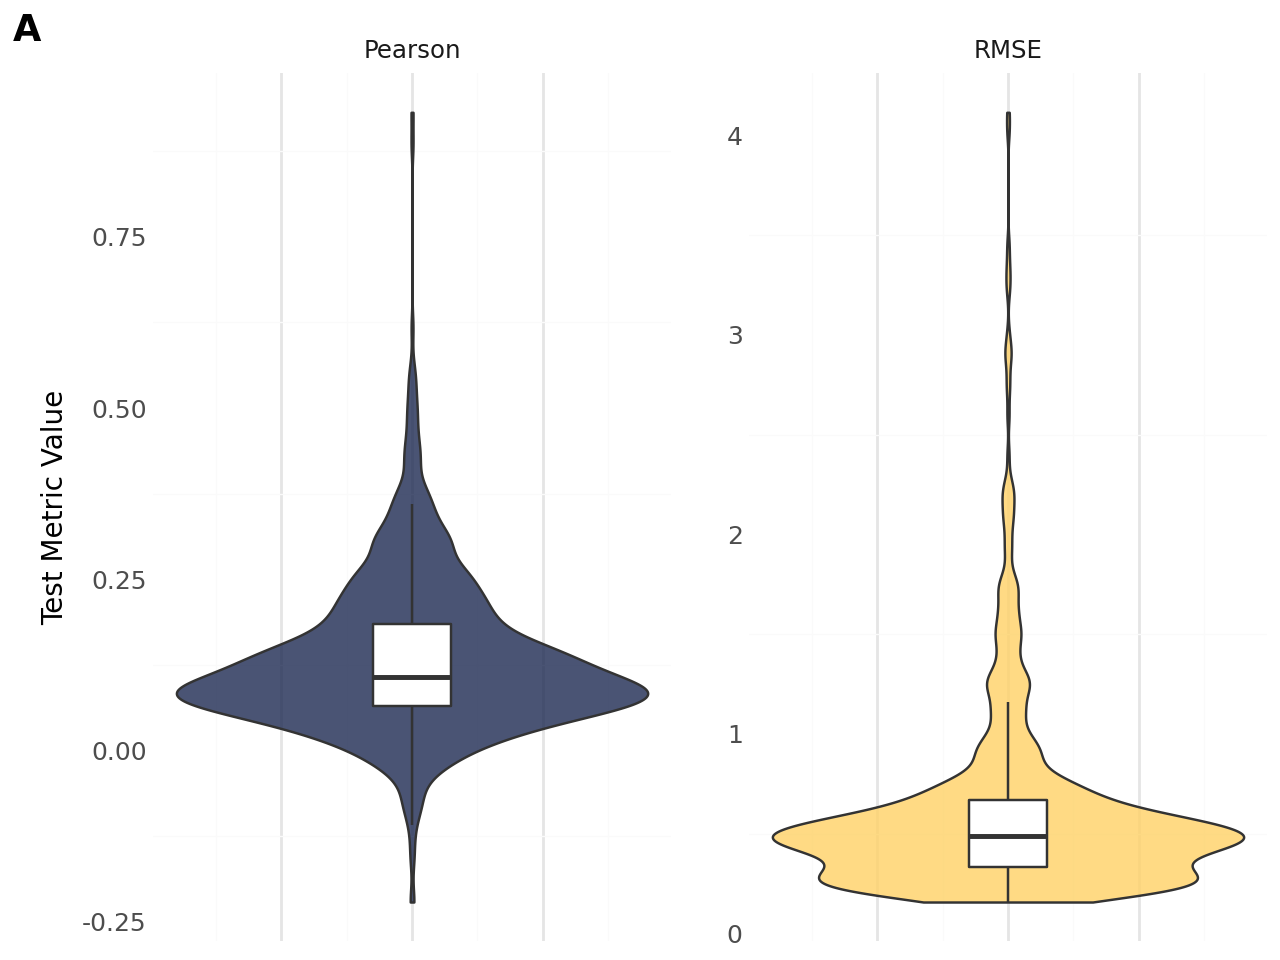

In [43]:
plot = (
    ggplot(recon_melted, aes(y="value", fill="metric"))
    + geom_violin(trim=False, alpha=0.8)
    + geom_boxplot(width=0.15, outlier_shape=None, fill="white")
    + scale_fill_manual(values=custom_colors[:2])
    + facet_wrap("~metric", scales="free_y")
    + guides(fill="none")
    + labs(tag="A", x="", y="Test Metric Value")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
    )
)

plot.save("output/parts/violin_ST_reconstruction-metrics.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/scatter_ST_reconstruction-metrics.svg


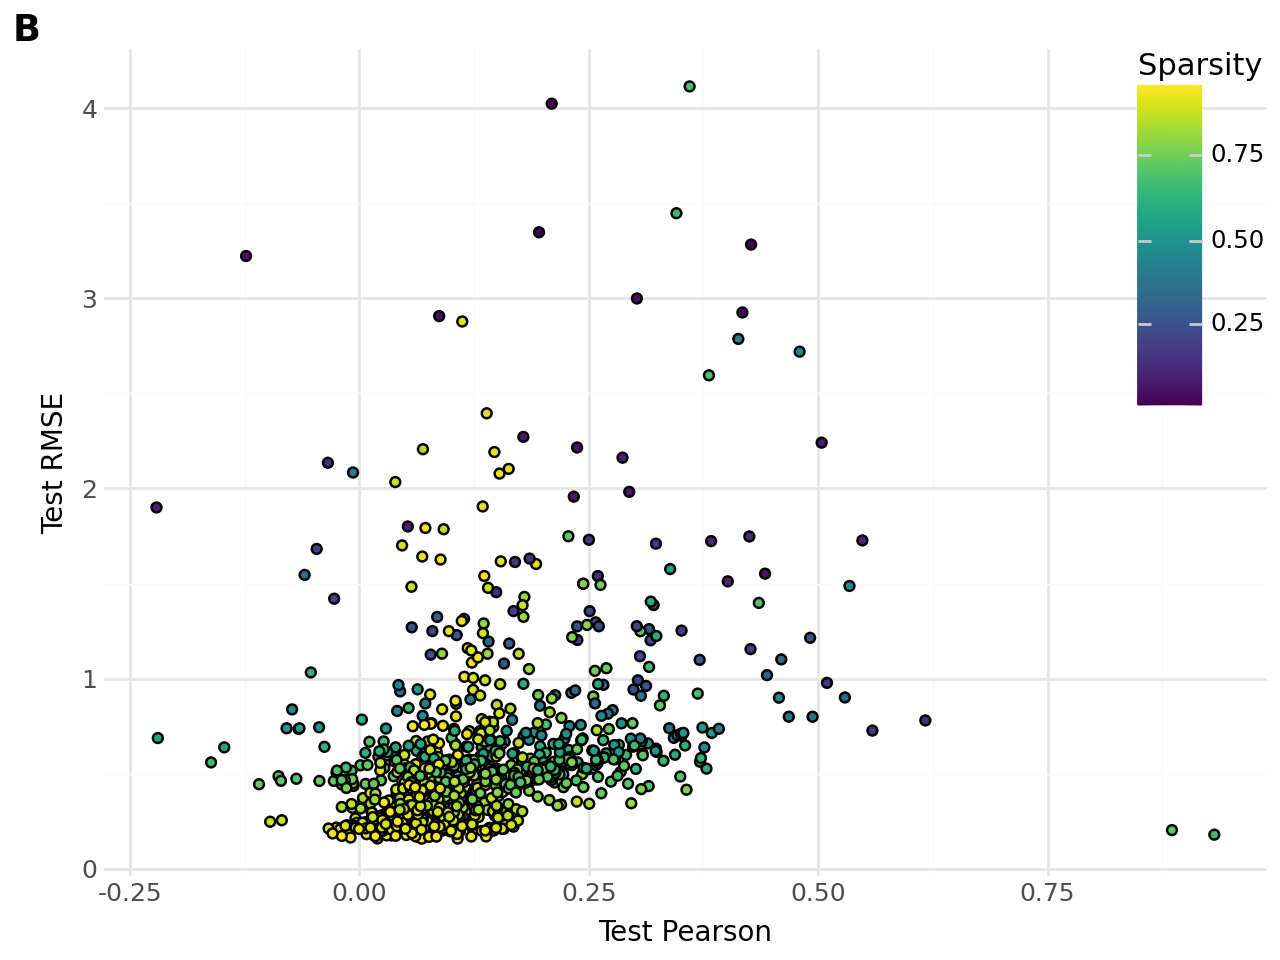

In [55]:
plot = (
    ggplot(
        reconstruction, aes(x="pearson_correlation", y="rmse", fill="target_sparsity")
    )
    + geom_point(raster=True)
    + labs(tag="B", x="Test Pearson", y="Test RMSE", fill="Sparsity")
    + theme_minimal()
    + theme(
        plot_background=element_rect(fill="#ffffff", color="#ffffff"),
        plot_tag=element_text(face="bold"),
        axis_title=element_text(size=10, face="plain"),
        axis_text=element_text(size=9, face="plain"),
        text=element_text(family="DejaVu Sans"),
        legend_position=(1, 1),
        legend_justification=(1, 1),
    )
)

plot.save("output/parts/scatter_ST_reconstruction-metrics.svg", dpi=300)
plot

### ST All

In [59]:
prediction = pd.read_feather(
    "data/masked_genes_sc_imp_seed_13_test_2_2025-08-20_02-13_gene_wise_metrics.feather"
)

prediction = prediction.drop(["spearman_correlation", "mae", "mse"], axis=1)
prediction.head()

,gene,pearson_correlation,target_mean,predicted_mean,rmse,target_sparsity,predicted_sparsity,sparsity_difference
0,Adora1,0.313994,0.251256,0.048982,0.492244,0.739352,0.0,0.739352
1,Vim,0.318074,0.195344,0.313715,0.437140,0.790352,0.0,0.790352
2,Myl9,0.035736,0.214629,0.042313,0.460719,0.761275,0.0,0.761275
3,Slc13a3,0.144876,0.194107,0.034046,0.449490,0.799012,0.0,0.799012
4,Chrna4,0.125077,0.034625,0.047644,0.167477,0.953382,0.0,0.953382


In [58]:
pred_melted = prediction.melt(
    id_vars=[
        "gene",
        "target_mean",
        "predicted_mean",
        "target_sparsity",
        "predicted_sparsity",
        "sparsity_difference",
    ],
    var_name="metric",
    value_name="value",
)

pred_melted["metric"] = pred_melted["metric"].replace(
    {"pearson_correlation": "Pearson", "rmse": "RMSE"}
)

pred_melted.head()

,gene,target_mean,predicted_mean,target_sparsity,predicted_sparsity,sparsity_difference,metric,value
0,Adora1,0.251256,0.048982,0.739352,0.0,0.739352,Pearson,0.313994
1,Vim,0.195344,0.313715,0.790352,0.0,0.790352,Pearson,0.318074
2,Myl9,0.214629,0.042313,0.761275,0.0,0.761275,Pearson,0.035736
3,Slc13a3,0.194107,0.034046,0.799012,0.0,0.799012,Pearson,0.144876
4,Chrna4,0.034625,0.047644,0.953382,0.0,0.953382,Pearson,0.125077


/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/violin_ST_prediction-metrics.svg


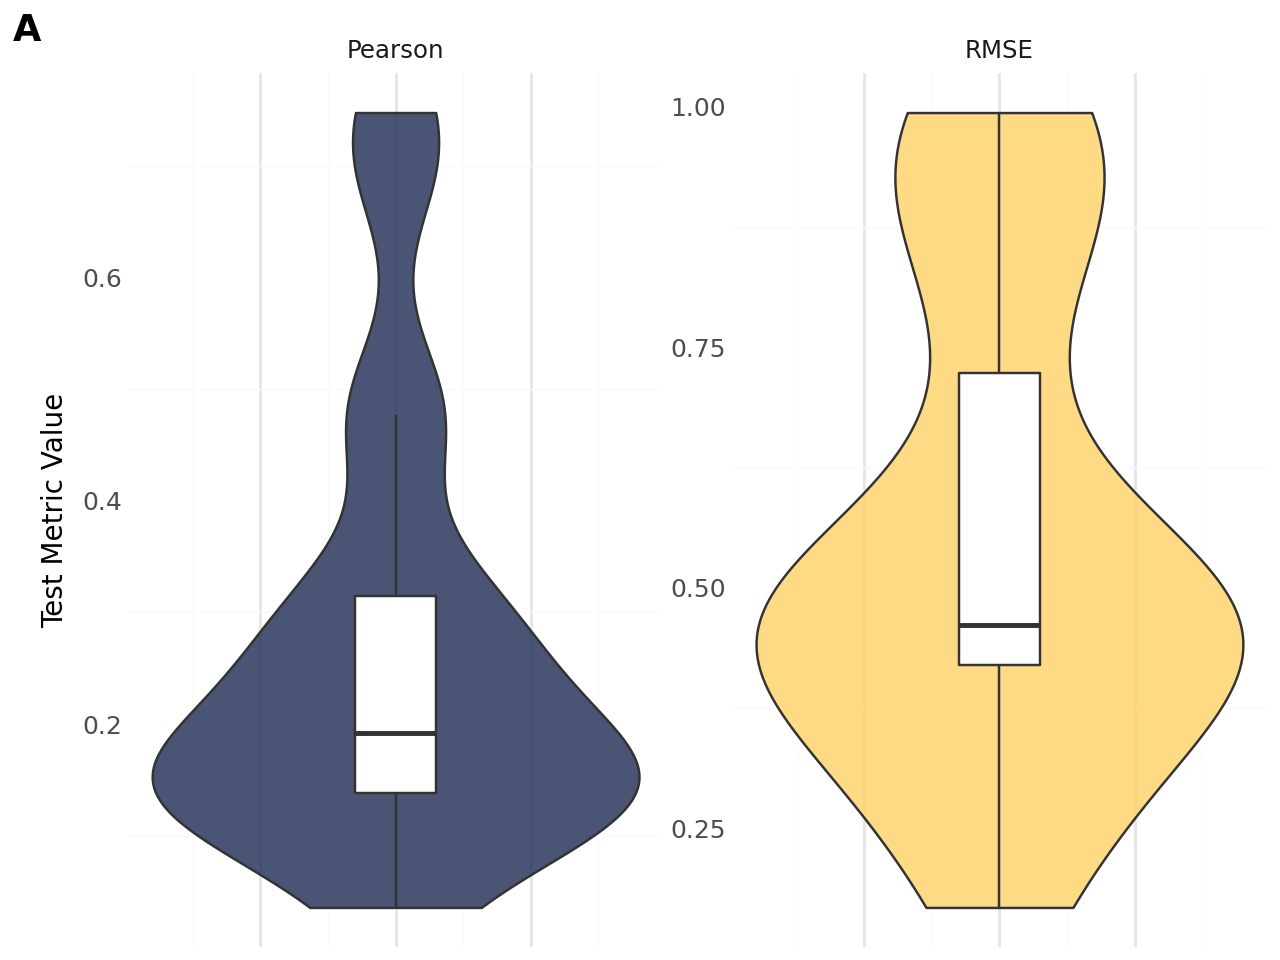

In [60]:
plot = (
    ggplot(pred_melted, aes(y="value", fill="metric"))
    + geom_violin(trim=False, alpha=0.8)
    + geom_boxplot(width=0.15, outlier_shape=None, fill="white")
    + scale_fill_manual(values=custom_colors[:2])
    + facet_wrap("~metric", scales="free_y")
    + guides(fill="none")
    + labs(tag="A", x="", y="Test Metric Value")
    + figure_theme
    + theme(
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
    )
)

plot.save("output/parts/violin_ST_prediction-metrics.svg", dpi=300)
plot

/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/software/miniforge3/envs/liver-sc-imputation/lib/python3.10/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: output/parts/scatter_ST_prediction-metrics.svg


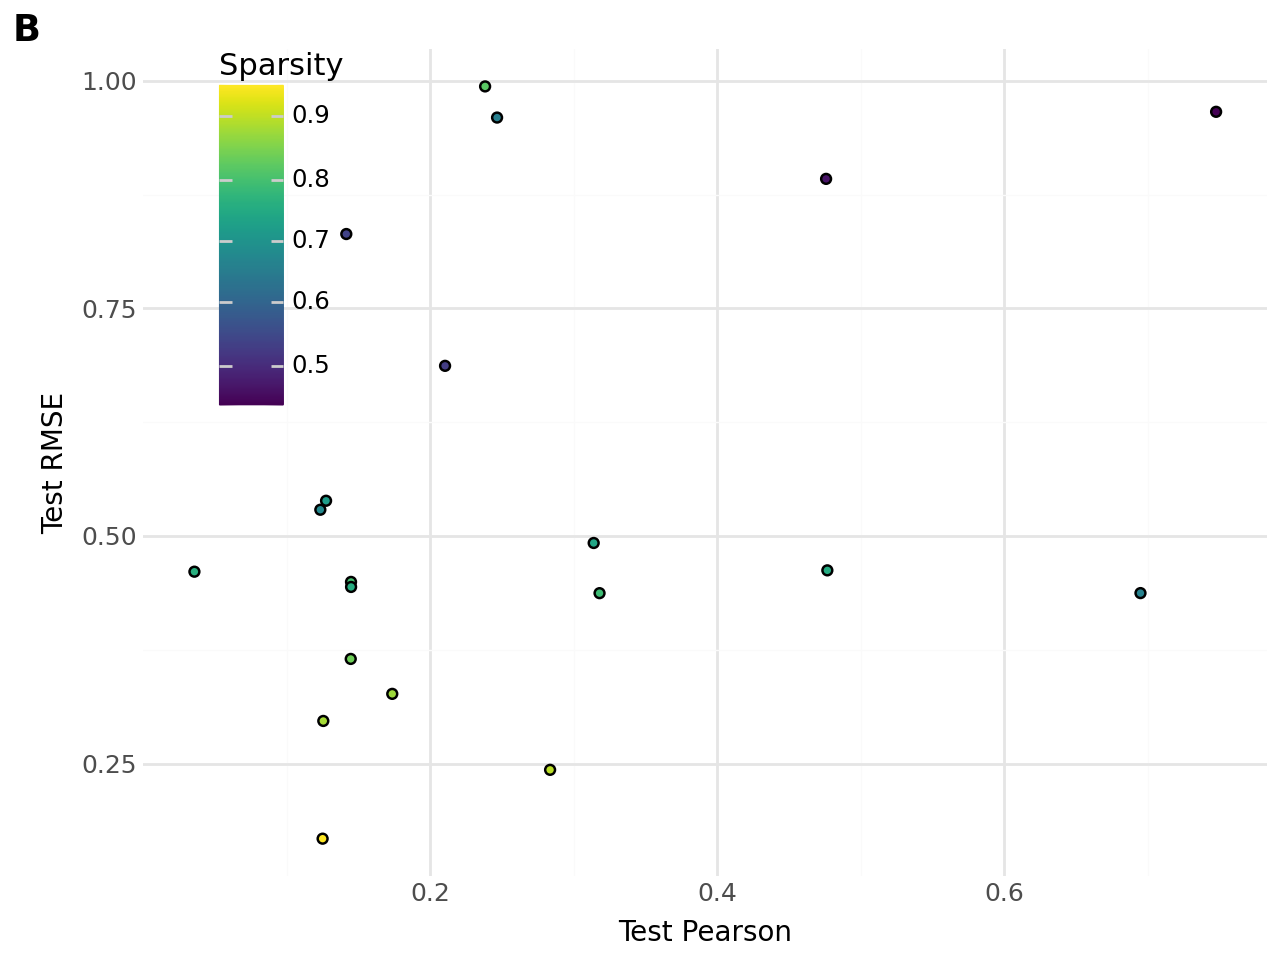

In [61]:
plot = (
    ggplot(prediction, aes(x="pearson_correlation", y="rmse", fill="target_sparsity"))
    + geom_point(raster=True)
    + labs(tag="B", x="Test Pearson", y="Test RMSE", fill="Sparsity")
    + theme_minimal()
    + theme(
        plot_background=element_rect(fill="#ffffff", color="#ffffff"),
        plot_tag=element_text(face="bold"),
        axis_title=element_text(size=10, face="plain"),
        axis_text=element_text(size=9, face="plain"),
        text=element_text(family="DejaVu Sans"),
        legend_position=(0.1, 1),
        legend_justification=(0.3, 1),
    )
)

plot.save("output/parts/scatter_ST_prediction-metrics.svg", dpi=300)
plot